# Importing libs

In [4]:
#!pip install Orange3 seaborn 

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import copy
#import random
#import scikit_posthocs as sp
import scipy.stats as stats
#from scipy.stats import normaltest
from scipy.stats import friedmanchisquare
#import pickle
import seaborn as sns
import Orange


In [6]:
from platform import python_version
import scipy
import seaborn
import Orange
import numpy
import pandas

print('Library versions:')
print('python', python_version())
print('scipy ',scipy. __version__ )
print('seaborn ',seaborn.__version__)
print('Orange ',Orange.__version__)
print('numpy ',numpy.__version__)
print('pandas ', pandas.__version__)


Library versions:
python 3.9.13
scipy  1.9.1
seaborn  0.11.2
Orange  3.34.1
numpy  1.21.5
pandas  1.4.4


# Loading the results

In [7]:
# First, let's load the results CSVs file into dataframes.

# Random Forests:
metamodel_performances_RF = pd.read_csv('../results/csv_tabs/metamodel_performances_loocv_RF.csv')
summary_predictions_RF = pd.read_csv('../results/csv_tabs/summary_of_predictions_loocv_RF.csv')

# Extra Trees:
metamodel_performances_ET = pd.read_csv('../results/csv_tabs/metamodel_performances_loocv_ET.csv')
summary_predictions_ET = pd.read_csv('../results/csv_tabs/summary_of_predictions_loocv_ET.csv')

# XGBoost:
metamodel_performances_XGB = pd.read_csv('../results/csv_tabs/metamodel_performances_loocv_XBG.csv')
summary_predictions_XGB = pd.read_csv('../results/csv_tabs/summary_of_predictions_loocv_XGB.csv')

# Bagging:
metamodel_performances_BAG = pd.read_csv('../results/csv_tabs/metamodel_performances_loocv_BAG.csv')
summary_predictions_BAG = pd.read_csv('../results/csv_tabs/summary_of_predictions_loocv_BAG.csv')

# KNORA-E:
metamodel_performances_KNE = pd.read_csv('../results/csv_tabs/metamodel_performances_loocv_KNORAE.csv')
summary_predictions_KNE = pd.read_csv('../results/csv_tabs/summary_of_predictions_loocv_KNORAE.csv')

# KNORA-U:
metamodel_performances_KNU = pd.read_csv('../results/csv_tabs/metamodel_performances_loocv_KNORAU.csv')
summary_predictions_KNU = pd.read_csv('../results/csv_tabs/summary_of_predictions_loocv_KNORAU.csv')

# METADES:
metamodel_performances_MTD = pd.read_csv('../results/csv_tabs/metamodel_performances_loocv_METADES.csv')
summary_predictions_MTD = pd.read_csv('../results/csv_tabs/summary_of_predictions_loocv_METADES.csv')

# DESMI:
metamodel_performances_DMI = pd.read_csv('../results/csv_tabs/metamodel_performances_loocv_DESMI.csv')
summary_predictions_DMI = pd.read_csv('../results/csv_tabs/summary_of_predictions_loocv_DESMI.csv')


In [8]:
models_names = metamodel_performances_RF['Model'].unique()

# Analysing meta-model performances

In [6]:
# Merging results for the various meta-model algorithms:
all_res_l = []
all_res_l.append(metamodel_performances_RF.set_index('Model').rename(columns={'Accuracy':'ACC RF', 'F1':'F1 RF'}))
all_res_l.append(metamodel_performances_ET.set_index('Model').rename(columns={'Accuracy':'ACC ET', 'F1':'F1 ET'}))
all_res_l.append(metamodel_performances_XGB.set_index('Model').rename(columns={'Accuracy':'ACC XGB', 'F1':'F1 XGB'}))
all_res_l.append(metamodel_performances_BAG.set_index('Model').rename(columns={'Accuracy':'ACC BAG', 'F1':'F1 BAG'}))
all_res_l.append(metamodel_performances_KNE.set_index('Model').rename(columns={'Accuracy':'ACC KNE', 'F1':'F1 KNE'}))
all_res_l.append(metamodel_performances_KNU.set_index('Model').rename(columns={'Accuracy':'ACC KNU', 'F1':'F1 KNU'}))
all_res_l.append(metamodel_performances_MTD.set_index('Model').rename(columns={'Accuracy':'ACC MTD', 'F1':'F1 MTD'}))
all_res_l.append(metamodel_performances_DMI.set_index('Model').rename(columns={'Accuracy':'ACC DMI', 'F1':'F1 DMI'}))

metamodel_performances = pd.concat(all_res_l, axis=1)
metamodel_performances

,ACC RF,F1 RF,ACC ET,F1 ET,ACC XGB,F1 XGB,ACC BAG,F1 BAG,ACC KNE,F1 KNE,ACC KNU,F1 KNU,ACC MTD,F1 MTD,ACC DMI,F1 DMI
Model,,,,,,,,,,,,,,,,
Bagging,0.3900,0.3488,0.3767,0.3340,0.3700,0.3233,0.3500,0.2928,0.3267,0.2955,0.4067,0.3701,0.3700,0.3256,0.3800,0.3389
GLVQ,0.8067,0.5489,0.7967,0.5243,0.7900,0.5541,0.6900,0.2435,0.7733,0.4813,0.8067,0.5155,0.7967,0.5478,0.7900,0.5235
GP,0.5567,0.5077,0.5467,0.5044,0.5467,0.4886,0.4467,0.2548,0.4867,0.4189,0.5533,0.5000,0.5367,0.4860,0.5133,0.4540
KNORAE,0.3533,0.3142,0.3567,0.3273,0.3633,0.3317,0.2733,0.2211,0.2833,0.2629,0.3567,0.3182,0.3333,0.3033,0.3233,0.3067
KNORAU,0.3800,0.3503,0.3933,0.3637,0.3667,0.3343,0.3367,0.2765,0.3533,0.3246,0.4200,0.3989,0.4167,0.3900,0.4167,0.3936
LCA,0.2533,0.2546,0.2433,0.2452,0.2400,0.2406,0.2500,0.2458,0.2567,0.2516,0.2833,0.2821,0.2967,0.2948,0.2900,0.2873
MCB,0.4033,0.3452,0.3967,0.3392,0.4267,0.3778,0.3967,0.3131,0.3400,0.3036,0.4300,0.3794,0.3933,0.3323,0.4100,0.3741
MLP,0.5800,0.4331,0.5733,0.4407,0.5633,0.4138,0.5300,0.3055,0.5300,0.4005,0.5833,0.4280,0.5933,0.4832,0.5500,0.4440
OLA,0.3533,0.3369,0.4100,0.3920,0.3933,0.3709,0.3000,0.2289,0.3167,0.2805,0.3633,0.3398,0.3567,0.3423,0.3833,0.3523


In [7]:
meta_model_names = ['RF', 'ET', 'XGB', 'BAG', 'KNE', 'KNU', 'MTD', 'DMI']

F1_cols = ['F1 RF', 'F1 ET', 'F1 XGB', 'F1 BAG', 'F1 KNE', 'F1 KNU', 'F1 MTD', 'F1 DMI']
renamer_F1 = dict(zip(F1_cols, meta_model_names))

Acc_cols = ['ACC RF', 'ACC ET', 'ACC XGB', 'ACC BAG', 'ACC KNE', 'ACC KNU', 'ACC MTD', 'ACC DMI']
renamer_acc = dict(zip(Acc_cols, meta_model_names))

metamodel_performances_F1 = metamodel_performances.filter(items=F1_cols).rename(columns=renamer_F1)
metamodel_performances_Acc = metamodel_performances.filter(items=Acc_cols).rename(columns=renamer_acc)

In [8]:
metamodel_performances_F1

,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
Model,,,,,,,,
Bagging,0.3488,0.3340,0.3233,0.2928,0.2955,0.3701,0.3256,0.3389
GLVQ,0.5489,0.5243,0.5541,0.2435,0.4813,0.5155,0.5478,0.5235
GP,0.5077,0.5044,0.4886,0.2548,0.4189,0.5000,0.4860,0.4540
KNORAE,0.3142,0.3273,0.3317,0.2211,0.2629,0.3182,0.3033,0.3067
KNORAU,0.3503,0.3637,0.3343,0.2765,0.3246,0.3989,0.3900,0.3936
LCA,0.2546,0.2452,0.2406,0.2458,0.2516,0.2821,0.2948,0.2873
MCB,0.3452,0.3392,0.3778,0.3131,0.3036,0.3794,0.3323,0.3741
MLP,0.4331,0.4407,0.4138,0.3055,0.4005,0.4280,0.4832,0.4440
OLA,0.3369,0.3920,0.3709,0.2289,0.2805,0.3398,0.3423,0.3523


In [9]:
metamodel_performances_F1.describe()

,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.378958,0.380950,0.380475,0.263542,0.337925,0.382800,0.380075,0.384642
std,0.113328,0.107023,0.105349,0.050925,0.090611,0.094594,0.108324,0.095821
min,0.162200,0.172800,0.199900,0.163100,0.195700,0.191700,0.170700,0.204800
25%,0.331225,0.332325,0.329600,0.239850,0.276100,0.334400,0.320025,0.330850
50%,0.349550,0.377850,0.374350,0.255950,0.314100,0.378700,0.361700,0.383850
75%,0.451750,0.456625,0.434900,0.295975,0.405100,0.443975,0.483900,0.446500
max,0.548900,0.524300,0.554100,0.360300,0.481300,0.515500,0.547800,0.532200


In [192]:
median_mean_std_rank_F1 = pd.DataFrame.from_records([metamodel_performances_F1.median(), 
                                                metamodel_performances_F1.mean(),
                                                metamodel_performances_F1.std(),
                                                metamodel_performances_F1.rank(axis='columns',
                                                                               numeric_only=True,
                                                                               ascending=False).mean()],
                                                index=['Median','Mean', 'Std-dev','Mean rank'])
median_mean_std_rank_F1

,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
Median,0.349550,0.377850,0.374350,0.255950,0.314100,0.378700,0.361700,0.383850
Mean,0.378958,0.380950,0.380475,0.263542,0.337925,0.382800,0.380075,0.384642
Std-dev,0.113328,0.107023,0.105349,0.050925,0.090611,0.094594,0.108324,0.095821
Mean rank,3.583333,3.583333,3.666667,7.666667,6.583333,3.666667,4.166667,3.083333


In [194]:
pd.concat([metamodel_performances_F1, median_mean_std_rank_F1], axis=0).to_csv('../results/csv_tabs/metamodel_performances_F1_ALL.csv', float_format='%.4f')

Box plots of meta-model performances (F1) over all base models


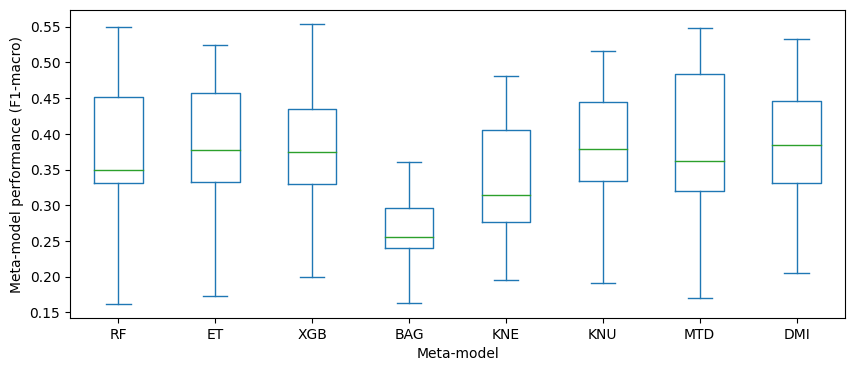

In [12]:
print('Box plots of meta-model performances (F1) over all base models')
metamodel_performances_F1.plot(kind='box', title='',figsize=(10,4));
plt.ylabel('Meta-model performance (F1-macro)')
plt.xlabel('Meta-model')
plt.savefig('../figs/box_plot_meta-model_perf_F1_ALL.pdf', bbox_inches = 'tight')

In [13]:
metamodel_performances_Acc

,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
Model,,,,,,,,
Bagging,0.3900,0.3767,0.3700,0.3500,0.3267,0.4067,0.3700,0.3800
GLVQ,0.8067,0.7967,0.7900,0.6900,0.7733,0.8067,0.7967,0.7900
GP,0.5567,0.5467,0.5467,0.4467,0.4867,0.5533,0.5367,0.5133
KNORAE,0.3533,0.3567,0.3633,0.2733,0.2833,0.3567,0.3333,0.3233
KNORAU,0.3800,0.3933,0.3667,0.3367,0.3533,0.4200,0.4167,0.4167
LCA,0.2533,0.2433,0.2400,0.2500,0.2567,0.2833,0.2967,0.2900
MCB,0.4033,0.3967,0.4267,0.3967,0.3400,0.4300,0.3933,0.4100
MLP,0.5800,0.5733,0.5633,0.5300,0.5300,0.5833,0.5933,0.5500
OLA,0.3533,0.4100,0.3933,0.3000,0.3167,0.3633,0.3567,0.3833


In [14]:
metamodel_performances_Acc.describe()

,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.457217,0.456400,0.456108,0.401950,0.415000,0.468050,0.455283,0.455267
std,0.175196,0.167387,0.166294,0.137022,0.164143,0.161006,0.166126,0.156663
min,0.196700,0.206700,0.220000,0.240000,0.213300,0.236700,0.203300,0.233300
25%,0.353300,0.371700,0.365850,0.293325,0.308350,0.361650,0.350850,0.365825
50%,0.396650,0.403350,0.410000,0.373350,0.346650,0.425000,0.405000,0.413350
75%,0.580000,0.560850,0.563300,0.495850,0.515000,0.560800,0.558350,0.550000
max,0.806700,0.796700,0.790000,0.690000,0.773300,0.806700,0.796700,0.790000


In [15]:
median_mean_std_Acc = pd.DataFrame.from_records([metamodel_performances_Acc.median(), 
                                                metamodel_performances_Acc.mean(),
                                                metamodel_performances_Acc.std()],
                                                index=['Median','Mean', 'Std-dev'])
median_mean_std_Acc

,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
Median,0.396650,0.403350,0.410000,0.373350,0.346650,0.425000,0.405000,0.413350
Mean,0.457217,0.456400,0.456108,0.401950,0.415000,0.468050,0.455283,0.455267
Std-dev,0.175196,0.167387,0.166294,0.137022,0.164143,0.161006,0.166126,0.156663


Box plots of meta-model performances (Acc) over all base models


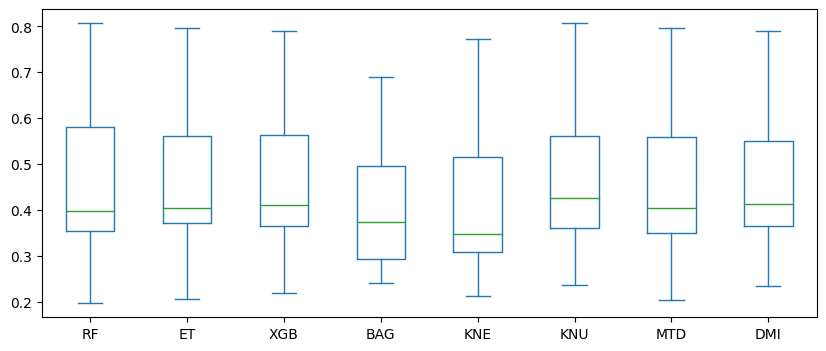

In [16]:
print('Box plots of meta-model performances (Acc) over all base models')
metamodel_performances_Acc.plot(kind='box', title='', figsize=(10,4));
plt.savefig('../figs/Meta-model_perfs_Acc.pdf', bbox_inches = 'tight')

## Hypothesis test

### For the F1 metric

Now, let's do a hypothesis test comparing the results of meta-model performance of each Meta-model to the each other. First we need to perform a normality test and then a hypothesis test to verify if the differences in results are in fact statistically significant.

In [117]:
#Normality tests (Shapiro):
for name in meta_model_names:
    print(f'The results with meta-model {name} is...')
    stat, p = stats.shapiro(metamodel_performances_F1[name])
    if p > 0.05: print(f'Probably Gaussian (p={p}).') # null hypothesis: x comes from a normal distribution
    else: print(f'Probably not Gaussian (p={p}).')

The results with meta-model RF is...
Probably Gaussian (p=0.725132405757904).
The results with meta-model ET is...
Probably Gaussian (p=0.6879796385765076).
The results with meta-model XGB is...
Probably Gaussian (p=0.9372097253799438).
The results with meta-model BAG is...
Probably Gaussian (p=0.9860461950302124).
The results with meta-model KNE is...
Probably Gaussian (p=0.679445743560791).
The results with meta-model KNU is...
Probably Gaussian (p=0.7649106383323669).
The results with meta-model MTD is...
Probably Gaussian (p=0.6505158543586731).
The results with meta-model DMI is...
Probably Gaussian (p=0.9787307977676392).


In [131]:
#Testing samples to see if they have equal variances (Bartlett's test):
print('H_0: All input  samples are from populations with equal variances')
alpha = 0.05
stat, p = stats.bartlett(metamodel_performances_F1['RF'],
                         metamodel_performances_F1['ET'],
                         metamodel_performances_F1['XGB'],
                         metamodel_performances_F1['BAG'],
                         metamodel_performances_F1['KNE'],
                         metamodel_performances_F1['KNU'],
                         metamodel_performances_F1['MTD'],
                         metamodel_performances_F1['DMI'])
if p < alpha: print(f'p-value = {p}. Reject H_0')
else: print(f'p-value = {p}. Unable to reject H_0')

H_0: All input  samples are from populations with equal variances
p-value = 0.39487301698100924. Unable to reject H_0


Normality tests indicated that samples probably follow a normal distribution, which would indicate the use of the ANOVA parametric test, additionally, the Bartlett's test indicate that the variances are similar, and this indicates the use of the ANOVA test. 

In [175]:
#ANOVA test: 
print('\n *** ANOVA ***\n')
print('H_0: Two or more groups have the same population mean.')
anova_result = stats.f_oneway(metamodel_performances_F1['RF'],
                                  metamodel_performances_F1['ET'],
                                  metamodel_performances_F1['XGB'],
                                  metamodel_performances_F1['BAG'],
                                  metamodel_performances_F1['KNE'],
                                  metamodel_performances_F1['KNU'],
                                  metamodel_performances_F1['MTD'],
                                  metamodel_performances_F1['DMI'])
print(anova_result)
alpha = 0.05
if anova_result.pvalue < alpha:
    print('Reject H_0')
else: 
    print('Fail to reject H_0')



 *** ANOVA ***

H_0: Two or more groups have the same population mean.
F_onewayResult(statistic=2.258847845507582, pvalue=0.03670461787389896)
Reject H_0


In [ ]:
#Friedman test:
print('\n *** Friedman ***\n')
print('H_0: Repeated samples of the same individuals have the same distribution.')
friedm_result = friedmanchisquare(metamodel_performances_F1['RF'],
                                  metamodel_performances_F1['ET'],
                                  metamodel_performances_F1['XGB'],
                                  metamodel_performances_F1['BAG'],
                                  metamodel_performances_F1['KNE'],
                                  metamodel_performances_F1['KNU'],
                                  metamodel_performances_F1['MTD'],
                                  metamodel_performances_F1['DMI'])
print(friedm_result)
alpha = 0.05
if friedm_result.pvalue < alpha:
    print('Reject H_0')
else: 
    print('Fail to reject H_0')

#Kruskal-Wallis test:
print('\n *** Krukal-Wallis H-test ***\n')
print('H_0: The population medians of all of the groups are equal.')
kruskal_result = stats.kruskal(metamodel_performances_F1['RF'],
                              metamodel_performances_F1['ET'],
                              metamodel_performances_F1['XGB'],
                              metamodel_performances_F1['BAG'],
                              metamodel_performances_F1['KNE'],
                              metamodel_performances_F1['KNU'],
                              metamodel_performances_F1['MTD'],
                              metamodel_performances_F1['DMI'])
print(kruskal_result)
alpha = 0.05
if kruskal_result.pvalue < alpha:
    print('Reject H_0')
else: 
    print('Fail to reject H_0')



 *** Friedman ***

H_0: Repeated samples of the same individuals have the same distribution.
FriedmanchisquareResult(statistic=39.111111111111086, pvalue=1.8613593474657918e-06)
Reject H_0

 *** Krukal-Wallis H-test ***

H_0: The population medians of all of the groups are equal.
KruskalResult(statistic=17.155068728522394, pvalue=0.016423172891752293)
Reject H_0


Since both tests indicate that there is statistically significant difference between the meta-level performances of different meta-models. We can now compare the pairs to check which of them are different.

Perform the Wilcoxon signed-rank test comparing each pair:

In [137]:
#Correcting alpha via Bonferroni correction:
n_samples = len(meta_model_names)
alpha = 0.05
c_alpha = alpha/(n_samples*(n_samples-1))
print(f'Corrected alpha = {c_alpha}')

#Wilcoxon signed rank test
print('H_0: Samples come from the same distribution')
pvalues = pd.DataFrame(columns=meta_model_names, index=meta_model_names)
for name1 in meta_model_names:
    for name2 in meta_model_names:
        if name1 != name2:
            # print(f'\n\nComparing meta-level performances of meta-models {name1} and {name2}:')
            diff = (metamodel_performances_F1[name1] -  metamodel_performances_F1[name2])
            res = stats.wilcoxon(diff)
            # print('H_0: no difference')
            # print(res)
            # if res.pvalue < c_alpha:
            #     print(f'{name1} significantly different than {name2}')
            # else:
            #     print(f'{name1} NOT significantly different than {name2}')
            pvalues.loc[name1, name2] = res.pvalue
        else:
            pvalues.loc[name1, name2] = np.nan
pvalues = pvalues[:].astype(float)
pvalues

Corrected alpha = 0.0008928571428571429


,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
RF,NaN,1.000000,0.909668,0.000977,0.003418,0.733398,0.850098,0.423828
ET,1.000000,NaN,0.969727,0.000977,0.002441,0.969727,0.791016,0.622070
XGB,0.909668,0.969727,NaN,0.000977,0.002441,0.850098,0.733398,0.850098
BAG,0.000977,0.000977,0.000977,NaN,0.002441,0.000488,0.000488,0.000488
KNE,0.003418,0.002441,0.002441,0.002441,NaN,0.000977,0.001465,0.000488
KNU,0.733398,0.969727,0.850098,0.000488,0.000977,NaN,0.677246,0.622070
MTD,0.850098,0.791016,0.733398,0.000488,0.001465,0.677246,NaN,0.518555
DMI,0.423828,0.622070,0.850098,0.000488,0.000488,0.622070,0.518555,NaN


Resulting p-values from comparing meta-level performances (F1) of Meta-models.


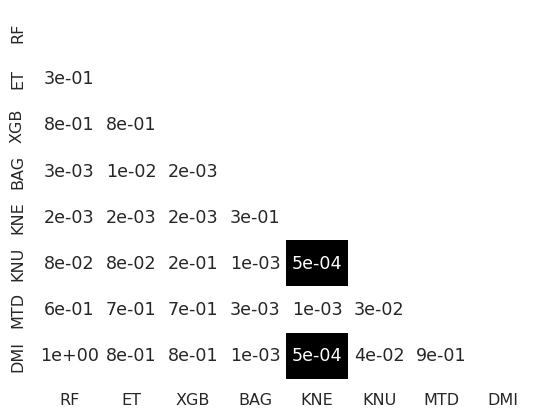

In [177]:
print('Resulting p-values from comparing meta-level performances (F1) of Meta-models.')
mask = np.triu(np.ones_like(pvalues, dtype=bool))
if pvalues.min().min() > c_alpha: 
    #vmax = pvalues[model].min().min()
    vmax = 0
    vmin = -1
else: 
    vmin = pvalues.min().min()
    vmax = c_alpha
sns.set(font_scale=1.05, rc={'axes.facecolor':'white'})
sns.heatmap(pvalues, annot=True, fmt='.0e',
            vmax=vmax, vmin=vmin, 
            cbar=False, mask=mask, cmap='Greys_r');
plt.savefig('../figs/heatmap_p_values_comp_mm_meta_perf.pdf')

In [156]:
metamodel_performances_F1.rank(axis='columns', numeric_only=True, ascending=False)

,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
Model,,,,,,,,
Bagging,2.0,4.0,6.0,8.0,7.0,1.0,5.0,3.0
GLVQ,2.0,4.0,1.0,8.0,7.0,6.0,3.0,5.0
GP,1.0,2.0,4.0,8.0,7.0,3.0,5.0,6.0
KNORAE,4.0,2.0,1.0,8.0,7.0,3.0,6.0,5.0
KNORAU,5.0,4.0,6.0,8.0,7.0,1.0,3.0,2.0
LCA,4.0,7.0,8.0,6.0,5.0,3.0,1.0,2.0
MCB,4.0,5.0,2.0,7.0,8.0,1.0,6.0,3.0
MLP,4.0,3.0,6.0,8.0,7.0,5.0,1.0,2.0
OLA,6.0,1.0,2.0,8.0,7.0,5.0,4.0,3.0


In [158]:
metamodel_performances_F1.rank(axis='columns', numeric_only=True, ascending=False).mean()

RF     3.583333
ET     3.583333
XGB    3.666667
BAG    7.666667
KNE    6.583333
KNU    3.666667
MTD    4.166667
DMI    3.083333
dtype: float64

### For the accuracy metric:

Now, let's do a hypothesis test comparing the results of meta-model performance of each Meta-model to the each other. First we need to perform a normality test and then a hypothesis test to verify if the differences in results are in fact statistically significant.

In [145]:
#Normality tests (Shapiro):
for name in meta_model_names:
    print(f'The results with meta-model {name} is...')
    stat, p = stats.shapiro(metamodel_performances_Acc[name])
    if p > 0.05: print(f'Probably Gaussian (p={p}).') # null hypothesis: x comes from a normal distribution
    else: print(f'Probably not Gaussian (p={p}).')

The results with meta-model RF is...
Probably Gaussian (p=0.6314103007316589).
The results with meta-model ET is...
Probably Gaussian (p=0.6962123513221741).
The results with meta-model XGB is...
Probably Gaussian (p=0.61931973695755).
The results with meta-model BAG is...
Probably Gaussian (p=0.43171045184135437).
The results with meta-model KNE is...
Probably Gaussian (p=0.2580339014530182).
The results with meta-model KNU is...
Probably Gaussian (p=0.7352880835533142).
The results with meta-model MTD is...
Probably Gaussian (p=0.7737552523612976).
The results with meta-model DMI is...
Probably Gaussian (p=0.7236515879631042).


In [148]:
#Testing samples to see if they have equal variances (Bartlett's test):
print('H_0: All input  samples are from populations with equal variances')
alpha = 0.05
stat, p = stats.bartlett(metamodel_performances_Acc['RF'],
                         metamodel_performances_Acc['ET'],
                         metamodel_performances_Acc['XGB'],
                         metamodel_performances_Acc['BAG'],
                         metamodel_performances_Acc['KNE'],
                         metamodel_performances_Acc['KNU'],
                         metamodel_performances_Acc['MTD'],
                         metamodel_performances_Acc['DMI'])
if p < alpha: print(f'p-value = {p}. Reject H_0')
else: print(f'p-value = {p}. Unable to reject H_0')

H_0: All input  samples are from populations with equal variances
p-value = 0.9979006360103327. Unable to reject H_0


While normality tests indicated that samples probably follow a normal distribution, which would indicate the use of the ANOVA parametric test, the Bartlett's test indicate that the variances are not equal, and this contradicts one of the assumptions of the ANOVA test. Hence, a non-parametric test is indicated. Below, we execute a Friedman test, and also a Kruskal-Wallis test.


In [149]:
#Friedman test:
print('\n *** Friedman ***\n')
print('H_0: Repeated samples of the same individuals have the same distribution.')
friedm_result = friedmanchisquare(metamodel_performances_Acc['RF'],
                                  metamodel_performances_Acc['ET'],
                                  metamodel_performances_Acc['XGB'],
                                  metamodel_performances_Acc['BAG'],
                                  metamodel_performances_Acc['KNE'],
                                  metamodel_performances_Acc['KNU'],
                                  metamodel_performances_Acc['MTD'],
                                  metamodel_performances_Acc['DMI'])
print(friedm_result)
alpha = 0.05
if friedm_result.pvalue < alpha:
    print('Reject H_0')
else: 
    print('Fail to reject H_0')

#Kruskal-Wallis test:
print('\n *** Krukal-Wallis H-test ***\n')
print('H_0: The population medians of all of the groups are equal.')
kruskal_result = stats.kruskal(metamodel_performances_Acc['RF'],
                              metamodel_performances_Acc['ET'],
                              metamodel_performances_Acc['XGB'],
                              metamodel_performances_Acc['BAG'],
                              metamodel_performances_Acc['KNE'],
                              metamodel_performances_Acc['KNU'],
                              metamodel_performances_Acc['MTD'],
                              metamodel_performances_Acc['DMI'])
print(kruskal_result)
alpha = 0.05
if kruskal_result.pvalue < alpha:
    print('Reject H_0')
else: 
    print('Fail to reject H_0')



 *** Friedman ***

H_0: Repeated samples of the same individuals have the same distribution.
FriedmanchisquareResult(statistic=35.982948846539614, pvalue=7.303190520083473e-06)
Reject H_0

 *** Krukal-Wallis H-test ***

H_0: The population medians of all of the groups are equal.
KruskalResult(statistic=3.1700180004160816, pvalue=0.8688412921109469)
Fail to reject H_0


Since one of the tests indicate that there is statistically significant difference between the meta-level performances of different meta-models. We can now compare the pairs to check which of them are different.

Perform the Wilcoxon signed-rank test comparing each pair:

In [150]:
#Correcting alpha via Bonferroni correction:
n_samples = len(meta_model_names)
alpha = 0.05
c_alpha = alpha/(n_samples*(n_samples-1))
print(f'Corrected alpha = {c_alpha}')

#Wilcoxon signed rank test
print('H_0: Samples come from the same distribution')
pvalues = pd.DataFrame(columns=meta_model_names, index=meta_model_names)
for name1 in meta_model_names:
    for name2 in meta_model_names:
        if name1 != name2:
            # print(f'\n\nComparing meta-level performances of meta-models {name1} and {name2}:')
            diff = (metamodel_performances_Acc[name1] -  metamodel_performances_Acc[name2])
            res = stats.wilcoxon(diff)
            # print('H_0: no difference')
            # print(res)
            # if res.pvalue < c_alpha:
            #     print(f'{name1} significantly different than {name2}')
            # else:
            #     print(f'{name1} NOT significantly different than {name2}')
            pvalues.loc[name1, name2] = res.pvalue
        else:
            pvalues.loc[name1, name2] = np.nan
pvalues = pvalues[:].astype(float)
pvalues

Corrected alpha = 0.0008928571428571429
H_0: Samples come from the same distribution


/export/livia/home/vision/Ldeamorim/miniconda3/envs/meta_scaler/lib/python3.8/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
RF,NaN,0.339355,0.850098,0.003418,0.002441,0.082656,0.622070,0.969727
ET,0.301270,NaN,0.824013,0.009925,0.002441,0.075224,0.683091,0.791016
XGB,0.791016,0.824013,NaN,0.002441,0.002441,0.151367,0.688792,0.755306
BAG,0.003418,0.009925,0.002441,NaN,0.306317,0.000977,0.003418,0.000977
KNE,0.002441,0.002441,0.002441,0.306317,NaN,0.000488,0.000977,0.000488
KNU,0.082656,0.075224,0.151367,0.000977,0.000488,NaN,0.042480,0.040760
MTD,0.622070,0.683091,0.688792,0.003418,0.000977,0.034180,NaN,0.893852
DMI,0.969727,0.791016,0.755306,0.000977,0.000488,0.040760,0.893852,NaN


Resulting p-values from comparing meta-level performances (Accuracy) of Meta-models.


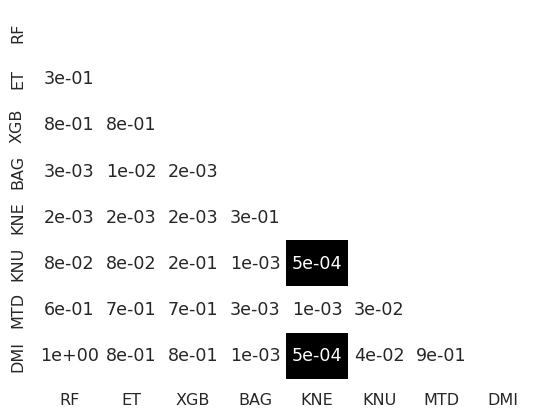

In [151]:
print('Resulting p-values from comparing meta-level performances (Accuracy) of Meta-models.')
mask = np.triu(np.ones_like(pvalues, dtype=bool))
if pvalues.min().min() > c_alpha: 
    #vmax = pvalues[model].min().min()
    vmax = 0
    vmin = -1
else: 
    vmin = pvalues.min().min()
    vmax = c_alpha
sns.set(font_scale=1.05, rc={'axes.facecolor':'white'})
sns.heatmap(pvalues, annot=True, fmt='.0e',
            vmax=vmax, vmin=vmin, 
            cbar=False, mask=mask, cmap='Greys_r');

In [162]:
metamodel_performances_Acc.rank(axis='columns', numeric_only=True, ascending=False)

,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
Model,,,,,,,,
Bagging,2.0,4.0,5.5,7.0,8.0,1.0,5.5,3.0
GLVQ,1.5,3.5,5.5,8.0,7.0,1.5,3.5,5.5
GP,1.0,3.5,3.5,8.0,7.0,2.0,5.0,6.0
KNORAE,4.0,2.5,1.0,8.0,7.0,2.5,5.0,6.0
KNORAU,5.0,4.0,6.0,8.0,7.0,1.0,2.5,2.5
LCA,5.0,7.0,8.0,6.0,4.0,3.0,1.0,2.0
MCB,4.0,5.5,2.0,5.5,8.0,1.0,7.0,3.0
MLP,3.0,4.0,5.0,7.5,7.5,2.0,1.0,6.0
OLA,6.0,1.0,2.0,8.0,7.0,4.0,5.0,3.0


In [163]:
metamodel_performances_Acc.rank(axis='columns', numeric_only=True, ascending=False).mean()

RF     3.458333
ET     4.125000
XGB    3.875000
BAG    6.916667
KNE    6.791667
KNU    2.291667
MTD    4.500000
DMI    4.041667
dtype: float64

# Analysing the final classification performance (base model)

## Comparing meta-models
First let's compare the results of classification performance (on the base level) for the 8 different meta-models:

### Per model:

Performance (F1) for each base model considering different meta-model


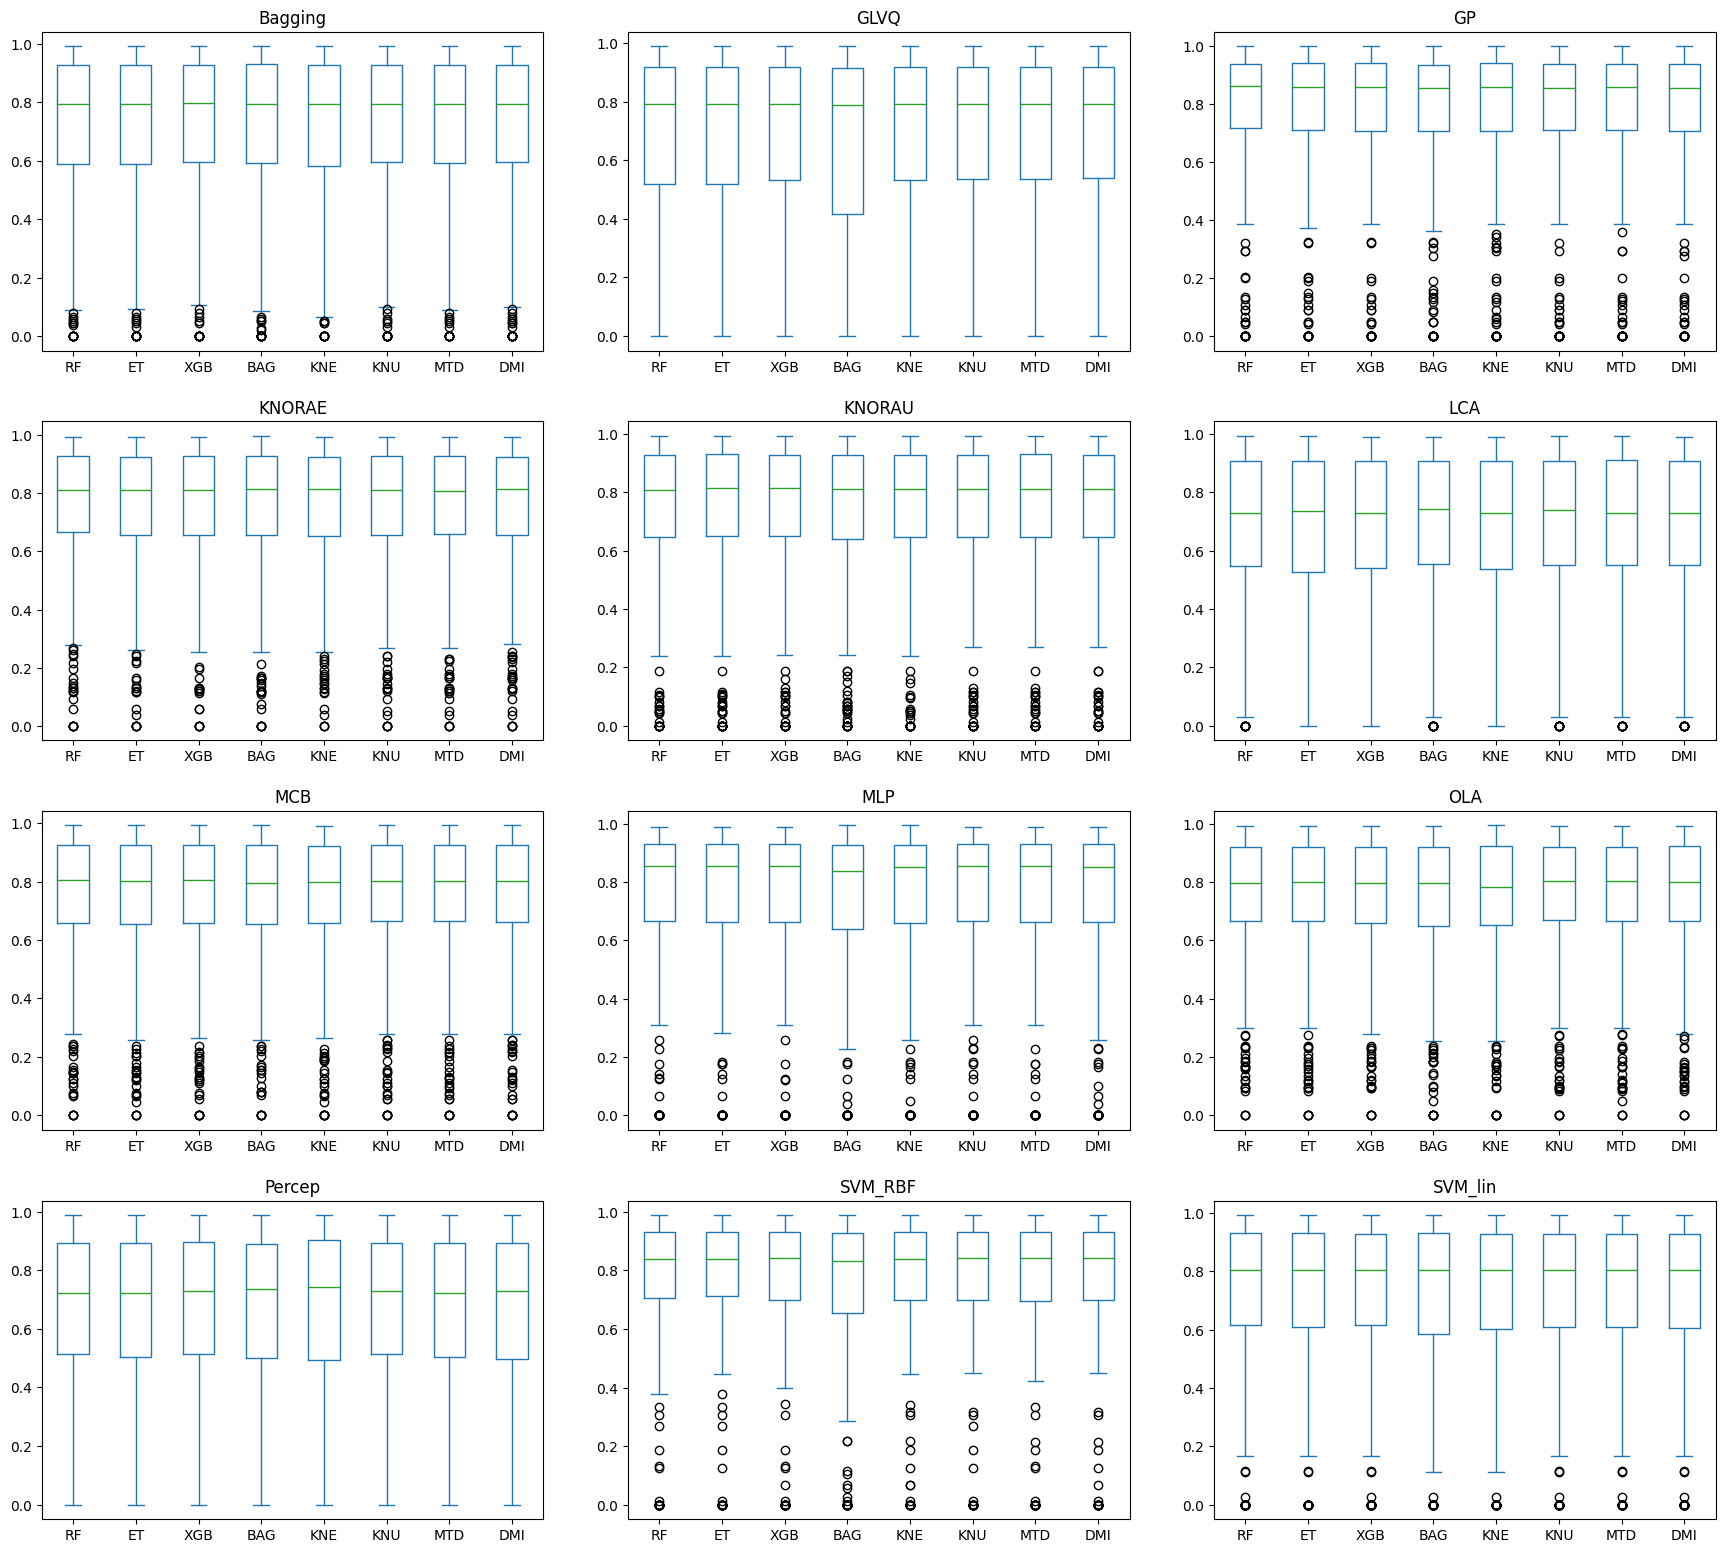

In [17]:
print('Performance (F1) for each base model considering different meta-model')
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18,16))
#fig.suptitle('Performance (F1) for each base model considering different meta-model', fontsize=20)
fig.tight_layout(pad=3.0)
i = 0
means_dict = {}
for model in models_names:
    perf_RF = summary_predictions_RF[summary_predictions_RF['Model']==model][["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'RF'})
    perf_ET = summary_predictions_ET[summary_predictions_ET['Model']==model][["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'ET'})
    perf_XGB = summary_predictions_XGB[summary_predictions_XGB['Model']==model][["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'XGB'})
    perf_BAG = summary_predictions_BAG[summary_predictions_BAG['Model']==model][["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'BAG'})
    perf_KNE = summary_predictions_KNE[summary_predictions_KNE['Model']==model][["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'KNE'})
    perf_KNU = summary_predictions_KNU[summary_predictions_KNU['Model']==model][["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'KNU'})
    perf_MTD = summary_predictions_MTD[summary_predictions_MTD['Model']==model][["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'MTD'})
    perf_DMI = summary_predictions_DMI[summary_predictions_DMI['Model']==model][["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'DMI'})
    perfs = pd.concat([perf_RF, perf_ET, perf_XGB, perf_BAG, perf_KNE, perf_KNU, perf_MTD, perf_DMI], axis=1)
    means_dict[model] = perfs.mean()
    perfs.plot(kind='box', title=model, ax=axs.flatten()[i]);
    i += 1
#plt.savefig('figs/comparing_feature_sets/box_plot_class_perf_per_model_per_feat_set.pdf', bbox_inches = 'tight')

Means for each model:

In [18]:
clf_perf_per_model = pd.DataFrame(means_dict).T
clf_perf_per_model.index.names = ['Model']
clf_perf_per_model

,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
Model,,,,,,,,
Bagging,0.716532,0.716037,0.717007,0.709470,0.713152,0.718495,0.717201,0.716966
GLVQ,0.657675,0.657337,0.657778,0.636820,0.655866,0.656747,0.657864,0.657624
GP,0.756893,0.755152,0.751453,0.744621,0.752389,0.754772,0.753728,0.752240
KNORAE,0.744082,0.743711,0.743540,0.738594,0.741422,0.743575,0.743371,0.743411
KNORAU,0.735347,0.734885,0.735205,0.726746,0.729699,0.737459,0.736764,0.738188
LCA,0.680336,0.676734,0.678187,0.682875,0.677388,0.683542,0.682917,0.678783
MCB,0.742723,0.742828,0.742418,0.738683,0.738038,0.743095,0.741923,0.743146
MLP,0.705656,0.708585,0.707131,0.683077,0.694096,0.702328,0.706706,0.700806
OLA,0.745415,0.744883,0.744835,0.737239,0.739531,0.744147,0.744126,0.743671


In [186]:
median_mean_std_rank_clf_perf_F1 = pd.DataFrame.from_records([clf_perf_per_model.median(), 
                                                clf_perf_per_model.mean(),
                                                clf_perf_per_model.std(),
                                                clf_perf_per_model.rank(axis='columns', 
                                                                        numeric_only=True,
                                                                        ascending=False).mean()],
                                                index=['Median','Mean', 'Std-dev', 'Mean rank'])
median_mean_std_rank_clf_perf_F1


,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
Median,0.725939,0.725461,0.726106,0.708353,0.721425,0.727977,0.726983,0.727577
Mean,0.717096,0.716630,0.716189,0.706112,0.712457,0.716955,0.716780,0.715997
Std-dev,0.032812,0.032966,0.032028,0.034101,0.032020,0.032358,0.032123,0.032794
Mean rank,2.833333,3.500000,4.000000,7.500000,6.916667,3.083333,3.916667,4.250000


In [187]:
pd.concat([clf_perf_per_model, median_mean_std_rank_clf_perf_F1], axis=0).to_csv('../results/csv_tabs/clf_perf_F1_ALL.csv',
                                                                     float_format='%.4f')

Base level classification performances (F1) achieved under the 8 meta-models, per model:


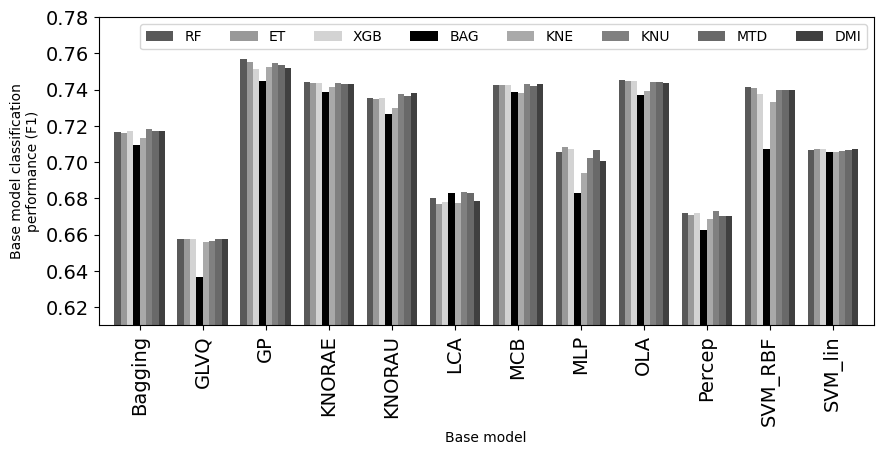

In [22]:
print('Base level classification performances (F1) achieved under the 8 meta-models, per model:')
clf_perf_per_model.plot.bar(width=0.8, figsize=(10,4), fontsize=14,
                            color={'RF':'#595959', 'ET':'#999999', 'XGB':'#D3D3D3', 'BAG':'#000000',
                                   'KNE':'#A9A9A9', 'KNU':'#808080', 'MTD':'#696969', 'DMI':'#404040'})
plt.ylim((0.61, 0.78))
plt.ylabel('Base model classification\nperformance (F1)')
plt.xlabel('Base model')
plt.legend(ncol=8);
plt.savefig('../figs/clf_perf_per_model_F1_ALL.pdf', bbox_inches = 'tight')

### For all models:

Overall classification perf. (F1) for the different meta-models:


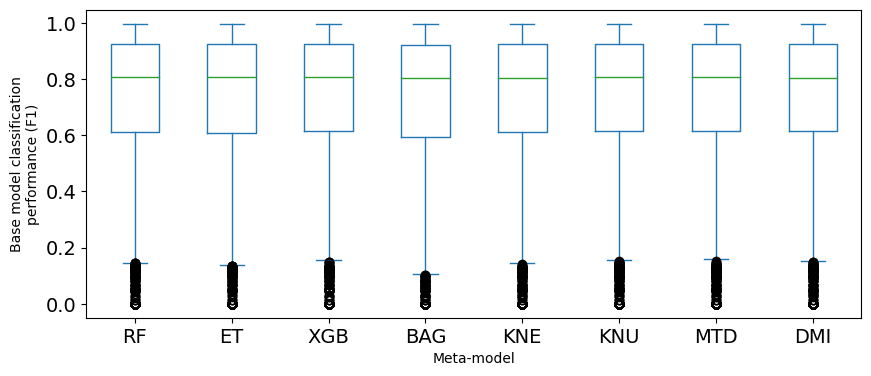

In [23]:
perf_RF = summary_predictions_RF[["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'RF'})
perf_ET = summary_predictions_ET[["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'ET'})
perf_XGB = summary_predictions_XGB[["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'XGB'})
perf_BAG = summary_predictions_BAG[["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'BAG'})
perf_KNE = summary_predictions_KNE[["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'KNE'})
perf_KNU = summary_predictions_KNU[["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'KNU'})
perf_MTD = summary_predictions_MTD[["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'MTD'})
perf_DMI = summary_predictions_DMI[["Meta-scaler's Perf"]].rename(columns={"Meta-scaler's Perf":'DMI'})
perfs = pd.concat([perf_RF, perf_ET, perf_XGB, perf_BAG, perf_KNE, perf_KNU, perf_MTD, perf_DMI], axis=1)
print('Overall classification perf. (F1) for the different meta-models:')
perfs.plot(kind='box', title='',figsize=(10,4), fontsize=14);
plt.ylabel('Base model classification\nperformance (F1)')
plt.xlabel('Meta-model')
plt.savefig('../figs/box_plot_clf_perf_F1_per_meta-model.pdf', bbox_inches = 'tight')

In [100]:
exec_times_dict = {'Meta-model':['RF', 'ET', 'XGB', 'BAG', 'KNE', 'KNU', 'MTD', 'DMI'],
                   'Training': [643.9853849117644, 458.69456899771467,
                                                4333.636337836506, 145.58184926304966,
                                                276.1003168527968, 280.6951155762654,
                                                468.57859996682964, 284.4762092875317],
                   'Testing': [78.7351495877374, 80.93847902258858,
                                                1.2999204655643553, 128.34692481835373,
                                                28.68369330931455, 27.555637267185375,
                                                38.750552125042304, 29.508998177712783]}

Training time in seconds:


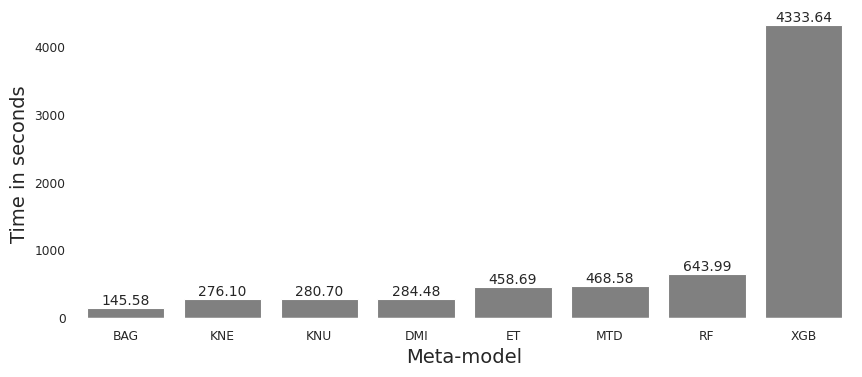

In [102]:

plt.figure(figsize=(10, 4))
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})
plots = sns.barplot(x='Meta-model', y='Training', data=exec_times_dict, 
                    order=['BAG', 'KNE', 'KNU', 'DMI', 'ET', 'MTD', 'RF', 'XGB'],
                    color='grey')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

plt.ylabel('Time in seconds')
plt.xlabel('Meta-model')
#plt.savefig('../figs/bar_plot_exec_times.pdf', bbox_inches = 'tight')
print('Training time in seconds:')

Testing time in seconds:


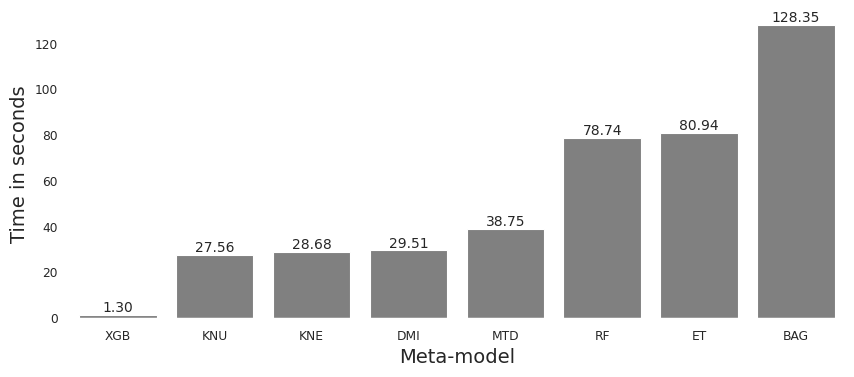

In [107]:
plt.figure(figsize=(10, 4))
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})
plots = sns.barplot(x='Meta-model', y='Testing', data=exec_times_dict, 
                    order=['XGB', 'KNU','KNE', 'DMI',  'MTD','RF', 'ET', 'BAG'],
                    color='grey')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

plt.ylabel('Time in seconds')
plt.xlabel('Meta-model')
#plt.savefig('../figs/bar_plot_exec_times.pdf', bbox_inches = 'tight')
print('Testing time in seconds:')

In [98]:
exec_times = pd.DataFrame(exec_times_dict)
exec_times = exec_times.set_index('Meta-model')
exec_times

,Training,Testing
Meta-model,,
RF,643.985385,78.735150
ET,458.694569,80.938479
XGB,4333.636338,1.299920
BAG,145.581849,128.346925
KNE,276.100317,28.683693
KNU,280.695116,27.555637
MTD,468.578600,38.750552
DMI,284.476209,29.508998


<Axes: xlabel='Meta-model'>

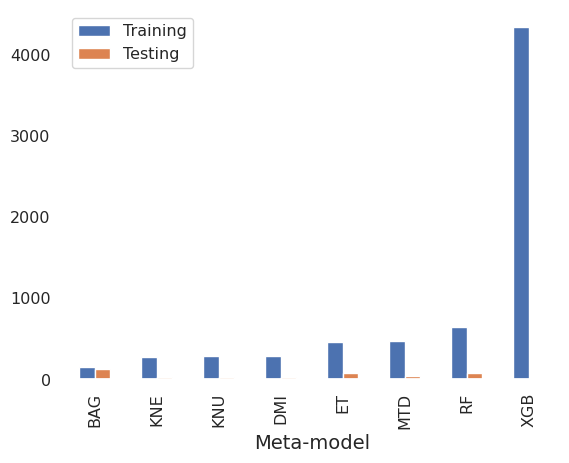

In [99]:
exec_times.sort_values(by='Training').plot(kind='bar')
#plt.figure(figsize=(10, 4))

In [27]:
pd.DataFrame(exec_times_dict).sort_values(by='Testing')

,Meta-model,Training,Testing
2,XGB,4333.636338,1.299920
5,KNU,280.695116,27.555637
4,KNE,276.100317,28.683693
7,DMI,284.476209,29.508998
6,MTD,468.578600,38.750552
0,RF,643.985385,78.735150
1,ET,458.694569,80.938479
3,BAG,145.581849,128.346925


## Comparing classification performance of Meta-models per model

In [109]:
clf_perfs = {'Bagging':{}, 'GLVQ':{}, 'GP':{}, 'KNORAE':{}, 'KNORAU':{}, 'LCA':{}, 'MCB':{}, 'MLP':{},
       'OLA':{}, 'Percep':{}, 'SVM_RBF':{}, 'SVM_lin':{}}
for model in models_names:
    clf_perfs[model]['RF'] = summary_predictions_RF[summary_predictions_RF['Model']==model][["Meta-scaler's Perf"]].values.reshape(300,)
    clf_perfs[model]['ET'] = summary_predictions_ET[summary_predictions_ET['Model']==model][["Meta-scaler's Perf"]].values.reshape(300,)
    clf_perfs[model]['XGB'] = summary_predictions_XGB[summary_predictions_XGB['Model']==model][["Meta-scaler's Perf"]].values.reshape(300,)
    clf_perfs[model]['BAG'] = summary_predictions_BAG[summary_predictions_BAG['Model']==model][["Meta-scaler's Perf"]].values.reshape(300,)
    clf_perfs[model]['KNE'] = summary_predictions_KNE[summary_predictions_KNE['Model']==model][["Meta-scaler's Perf"]].values.reshape(300,)
    clf_perfs[model]['KNU'] = summary_predictions_KNU[summary_predictions_KNU['Model']==model][["Meta-scaler's Perf"]].values.reshape(300,)
    clf_perfs[model]['MTD'] = summary_predictions_MTD[summary_predictions_MTD['Model']==model][["Meta-scaler's Perf"]].values.reshape(300,)
    clf_perfs[model]['DMI'] = summary_predictions_DMI[summary_predictions_DMI['Model']==model][["Meta-scaler's Perf"]].values.reshape(300,)


Now, let's do a hypothesis test comparing the results of each Meta-model to the each other. First we need to perform a normality test and then a hypothesis test to verify if the differences in results are in fact statistically significant.

In [110]:
#Normality tests (Shapiro):
for model in models_names:
    for name in meta_model_names:
        print(f'For base model {model}, the results with meta-model {name} is...')
        stat, p = stats.shapiro(clf_perfs[model][name])
        if p > 0.05: print(f'Probably Gaussian (p={p}).') # null hypothesis: x comes from a normal distribution
        else: print(f'Probably not Gaussian (p={p}).')

For base model Bagging, the results with meta-model RF is...
Probably not Gaussian (p=4.8090656231109975e-17).
For base model Bagging, the results with meta-model ET is...
Probably not Gaussian (p=5.4696067307982775e-17).
For base model Bagging, the results with meta-model XGB is...
Probably not Gaussian (p=5.974137273618871e-17).
For base model Bagging, the results with meta-model BAG is...
Probably not Gaussian (p=1.6457497786210108e-17).
For base model Bagging, the results with meta-model KNE is...
Probably not Gaussian (p=3.7193180317989376e-17).
For base model Bagging, the results with meta-model KNU is...
Probably not Gaussian (p=3.237516757850076e-17).
For base model Bagging, the results with meta-model MTD is...
Probably not Gaussian (p=6.065036482004568e-17).
For base model Bagging, the results with meta-model DMI is...
Probably not Gaussian (p=3.636787244234317e-17).
For base model GLVQ, the results with meta-model RF is...
Probably not Gaussian (p=1.270325694375149e-19).
For

Since normality tests indicated that samples may not follow a normal distribution, let's apply a non parametric test. Friedman test seems to be adequate since "Due to the assumption that the test statistic has a chi squared distribution, the p-value is only reliable for n > 10 and more than 6 repeated samples." In our case n = 300 and n_samples = 8.

In [111]:
#Friedman test:
p_values_friedman_mm_comparison = {'Model':[], 'Statistic': [], 'p-value':[], 'Rejects $H_0$?':[]}
for model in models_names:
    p_values_friedman_mm_comparison['Model'].append(model)
    #print(f'Base model = {model}')
    friedm_result = friedmanchisquare(clf_perfs[model]['RF'], clf_perfs[model]['ET'], clf_perfs[model]['XGB'],
                                      clf_perfs[model]['BAG'], clf_perfs[model]['KNE'], clf_perfs[model]['KNU'],
                                      clf_perfs[model]['MTD'], clf_perfs[model]['DMI'])
    #print(friedm_result)
    p_values_friedman_mm_comparison['Statistic'].append(friedm_result.statistic)
    p_values_friedman_mm_comparison['p-value'].append(friedm_result.pvalue)
    alpha = 0.05
    if friedm_result.pvalue < alpha:
        #print('Reject the null hypothesis that the mean for each population is equal')
        p_values_friedman_mm_comparison['Rejects $H_0$?'].append('✓')
    else: 
        #print('Fail to reject the null hypothesis that the mean for each population is equal')
        p_values_friedman_mm_comparison['Rejects $H_0$?'].append('')

p_values_friedman_mm_comparison = pd.DataFrame(p_values_friedman_mm_comparison)
p_values_friedman_mm_comparison.to_csv('../results/csv_tabs/p_values_friedman_mm_comparison.csv',float_format='%.4e')
p_values_friedman_mm_comparison

,Model,Statistic,p-value,Rejects $H_0$?
0,Bagging,23.647999,1.313501e-03,✓
1,GLVQ,100.623438,8.020003e-19,✓
2,GP,62.383235,5.037633e-11,✓
3,KNORAE,40.008954,1.253833e-06,✓
4,KNORAU,39.964101,1.278862e-06,✓
5,LCA,10.542950,1.598351e-01,
6,MCB,14.500094,4.296889e-02,✓
7,MLP,53.011311,3.688133e-09,✓
8,OLA,18.078515,1.162074e-02,✓
9,Percep,9.899190,1.943587e-01,


Perform the Wilcoxon signed-rank test comparing each pair:

In [112]:
#Correcting alpha via Bonferroni correction:
n_samples = len(meta_model_names)
alpha = 0.05
c_alpha = alpha/(n_samples*(n_samples-1))
print(f'Corrected alpha = {c_alpha}')

#Wilcoxon signed rank test
pvalues = {}
for model in models_names:
    pvalues[model] = pd.DataFrame(columns=meta_model_names, index=meta_model_names)
    for name1 in meta_model_names:
        for name2 in meta_model_names:
            if name1 != name2:
                print(f'\n\nComparing meta-models {name1} with {name2} for base model {model}:')
                diff = (clf_perfs[model][name1] -  clf_perfs[model][name2])
                res = stats.wilcoxon(diff)
                print('H_0: no difference')
                print(res)
                if res.pvalue < c_alpha:
                    print(f'{name1} significantly different than {name2}')
                else:
                    print(f'{name1} NOT significantly different than {name2}')
                pvalues[model].loc[name1, name2] = res.pvalue
            else:
                pvalues[model].loc[name1, name2] = np.nan
    pvalues[model] = pvalues[model][:].astype(float)

Corrected alpha = 0.0008928571428571429


Comparing meta-models RF with ET for base model Bagging:
H_0: no difference
WilcoxonResult(statistic=730.0, pvalue=0.9142910033951035)
RF NOT significantly different than ET


Comparing meta-models RF with XGB for base model Bagging:
H_0: no difference
WilcoxonResult(statistic=976.0, pvalue=0.826591366849683)
RF NOT significantly different than XGB


Comparing meta-models RF with BAG for base model Bagging:
H_0: no difference
WilcoxonResult(statistic=3078.0, pvalue=0.001977476063087802)
RF NOT significantly different than BAG


Comparing meta-models RF with KNE for base model Bagging:
H_0: no difference
WilcoxonResult(statistic=3276.0, pvalue=0.13525086517585794)
RF NOT significantly different than KNE


Comparing meta-models RF with KNU for base model Bagging:
H_0: no difference
WilcoxonResult(statistic=650.0, pvalue=0.11159775842008125)
RF NOT significantly different than KNU


Comparing meta-models RF with MTD for base model Bagging:
H_0: no

Resulting p-values from comparing Meta-models for each model.


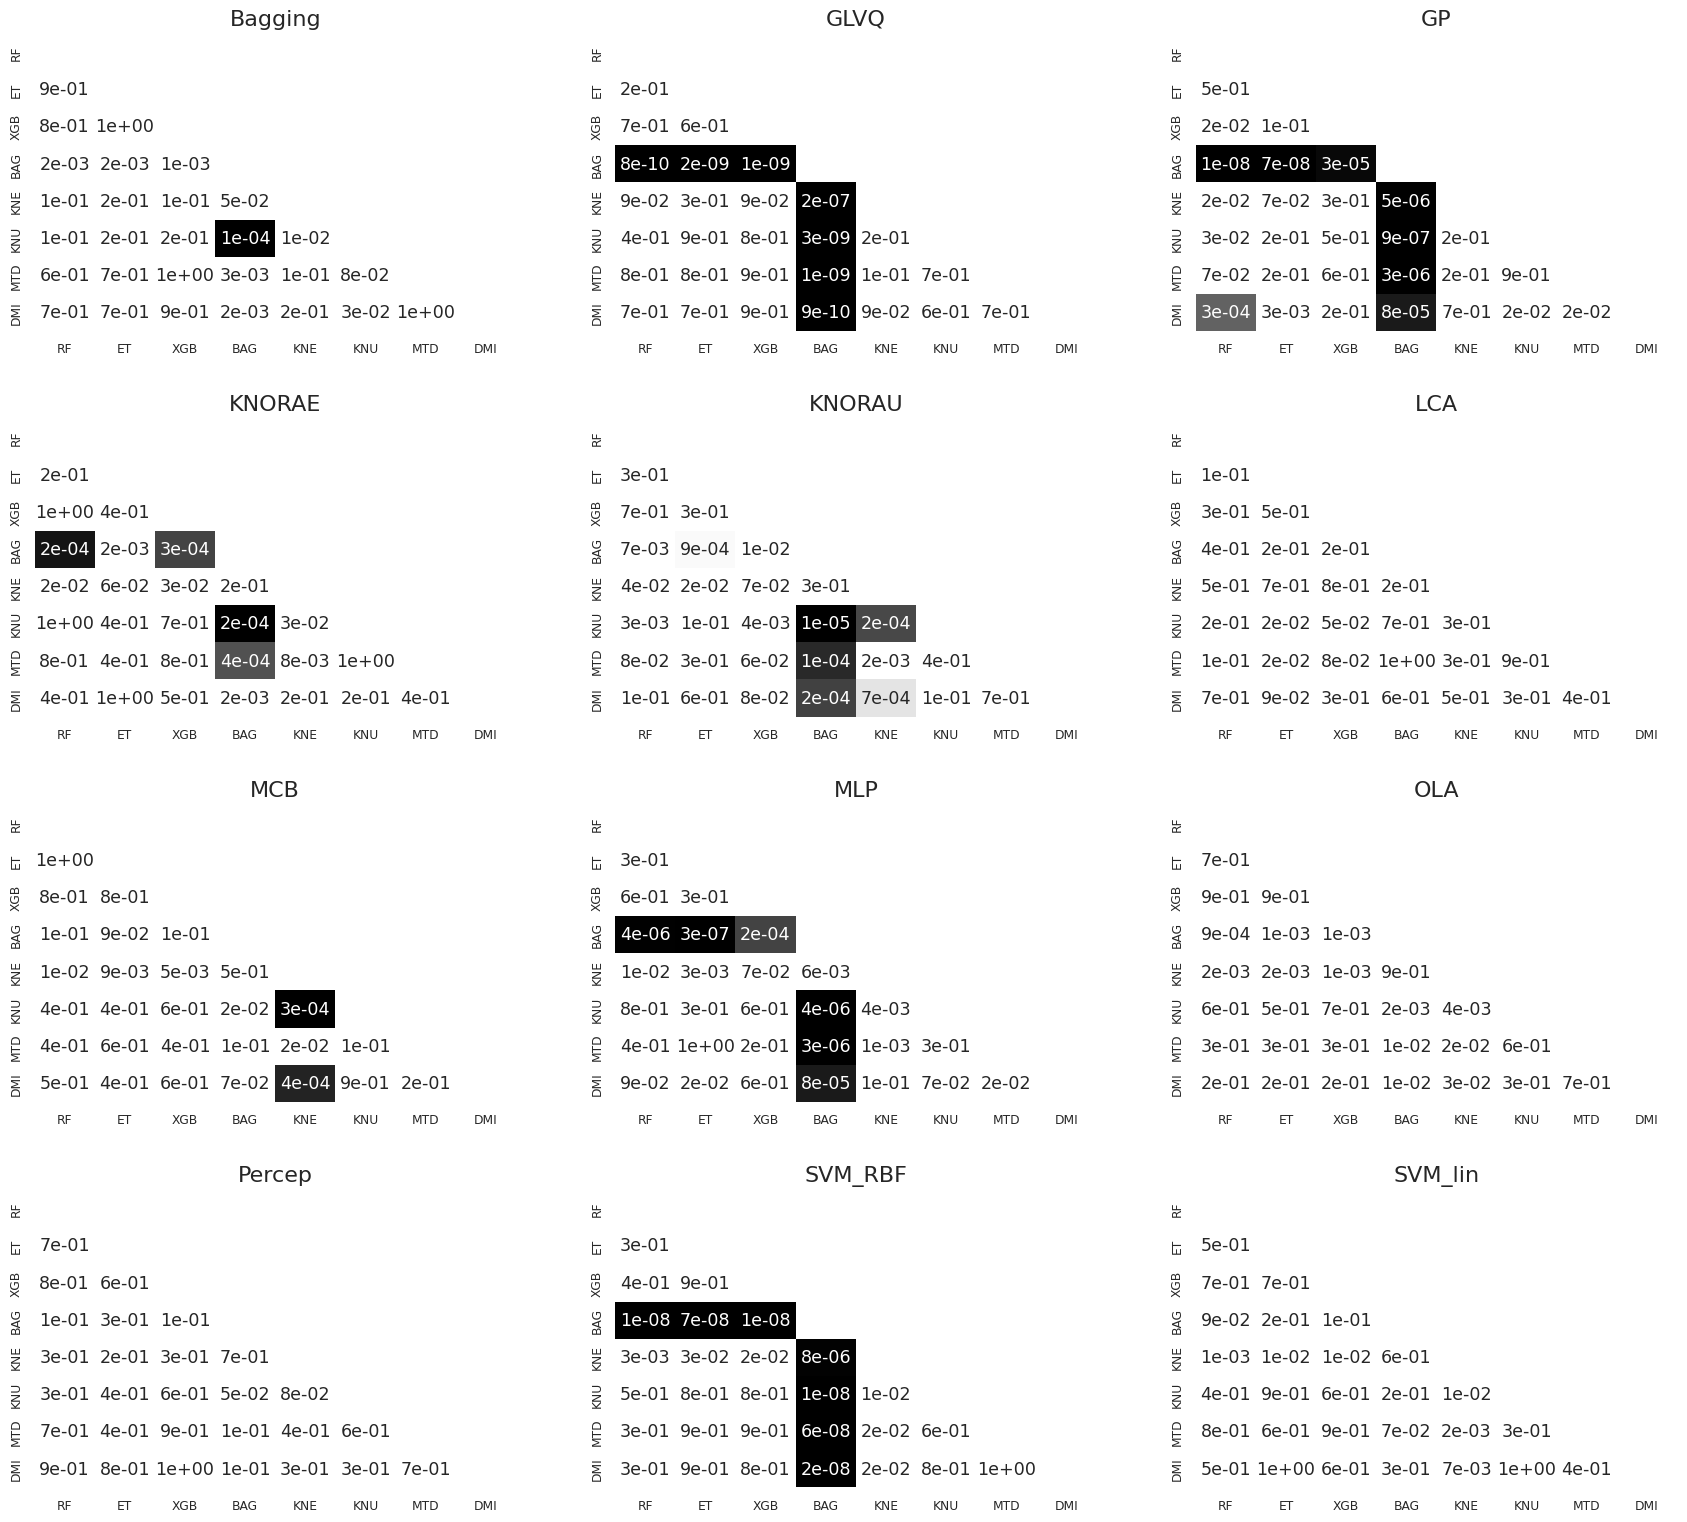

In [113]:
print('Resulting p-values from comparing Meta-models for each model.')
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18,16))
#fig.suptitle('Resulting p-values from comparing Meta-models for each model.', fontsize=20)
fig.tight_layout(pad=3.0)
i = 0
for model in models_names:
    # mask = pvalues[model] > c_alpha
    mask = np.triu(np.ones_like(pvalues[model], dtype=bool))
    if pvalues[model].min().min() > c_alpha: 
        #vmax = pvalues[model].min().min()
        vmax = 0
        vmin = -1
    else: 
        vmin = pvalues[model].min().min()
        vmax = c_alpha
    sns.set(font_scale=1.05, rc={'axes.facecolor':'white'})
    sns.heatmap(pvalues[model], ax=axs.flatten()[i], annot=True, fmt='.0e',
                vmax=vmax, vmin=vmin, 
                cbar=False, mask=mask, cmap='Greys_r')
    axs.flatten()[i].set_title(model, fontsize=16)
    i += 1

plt.savefig('../figs/heatmap_p_values_comp_mm_base_perf.pdf', bbox_inches = 'tight')

In [168]:
model = 'Bagging'
pd.DataFrame(clf_perfs[model])

,RF,ET,XGB,BAG,KNE,KNU,MTD,DMI
0,0.440079,0.440079,0.440079,0.440079,0.451235,0.451235,0.451235,0.451235
1,0.612080,0.612080,0.625778,0.625778,0.612080,0.612080,0.612080,0.612080
2,0.400698,0.400698,0.397866,0.450370,0.400698,0.450370,0.397866,0.450370
3,0.500806,0.266380,0.266380,0.266380,0.266380,0.500806,0.500806,0.500806
4,0.584809,0.500638,0.584809,0.584809,0.514078,0.514078,0.584809,0.514078
...,...,...,...,...,...,...,...,...
295,0.528555,0.528555,0.528555,0.529548,0.526306,0.528555,0.528555,0.528555
296,0.649457,0.649457,0.649457,0.658744,0.699809,0.649457,0.649457,0.649457
297,0.596430,0.596430,0.596430,0.596430,0.596430,0.596430,0.596430,0.596430
298,0.460123,0.419001,0.419001,0.501321,0.501321,0.419001,0.419001,0.419001


# Considering only the DMI meta-model 

## Meta-model performances

In [980]:
metamodel_performances_DMI

,Model,Accuracy,F1
0,Bagging,0.3800,0.3389
1,GLVQ,0.7900,0.5235
2,GP,0.5133,0.4540
3,KNORAE,0.3233,0.3067
4,KNORAU,0.4167,0.3936
5,LCA,0.2900,0.2873
6,MCB,0.4100,0.3741
7,MLP,0.5500,0.4440
8,OLA,0.3833,0.3523
9,Percep,0.2333,0.2048


In [196]:
med_mean_std_metam_perf_DMI = pd.DataFrame.from_records([metamodel_performances_DMI[['Accuracy','F1']].median(), 
                                                         metamodel_performances_DMI[['Accuracy','F1']].mean(),
                                                         metamodel_performances_DMI[['Accuracy','F1']].std()],
                                                         index=['Median','Mean', 'Std-dev'])
mmp_DMI = pd.concat([metamodel_performances_DMI.set_index('Model'), med_mean_std_metam_perf_DMI])
mmp_DMI.to_csv('../results/csv_tabs/meta-model_perf_DMI.csv',float_format='%.4f')
mmp_DMI

,Accuracy,F1
Bagging,0.380000,0.338900
GLVQ,0.790000,0.523500
GP,0.513300,0.454000
KNORAE,0.323300,0.306700
KNORAU,0.416700,0.393600
LCA,0.290000,0.287300
MCB,0.410000,0.374100
MLP,0.550000,0.444000
OLA,0.383300,0.352300
Percep,0.233300,0.204800


In [983]:
mmp_DMI.T.to_csv('../results/csv_tabs/meta-model_perf_DMI_transposed.csv',float_format='%.4f')
mmp_DMI.T

,Bagging,GLVQ,GP,KNORAE,KNORAU,LCA,MCB,MLP,OLA,Percep,SVM_RBF,SVM_lin,Median,Mean,Std-dev
Accuracy,0.3800,0.7900,0.5133,0.3233,0.4167,0.2900,0.4100,0.550,0.3833,0.2333,0.6233,0.5500,0.41335,0.455267,0.156663
F1,0.3389,0.5235,0.4540,0.3067,0.3936,0.2873,0.3741,0.444,0.3523,0.2048,0.5322,0.4043,0.38385,0.384642,0.095821


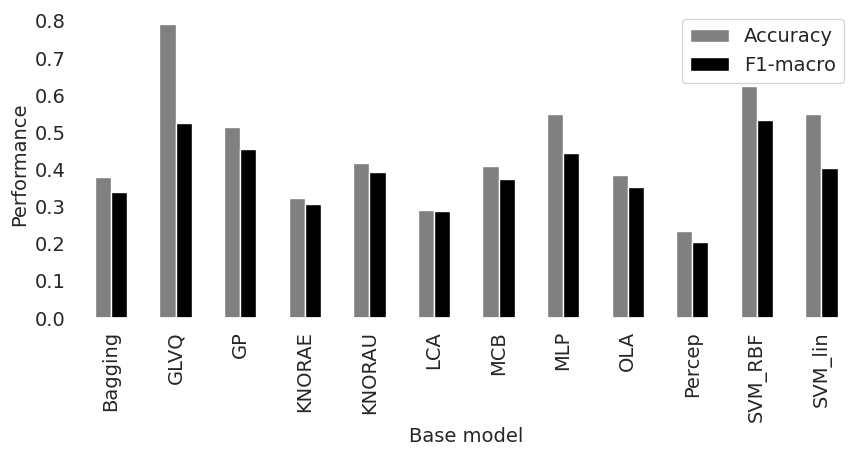

In [197]:
metamodel_performances_DMI.plot.bar(x='Model', color=['grey','black'], figsize=(10,4), fontsize=14)
plt.ylabel('Performance', fontsize=14)
plt.xlabel('Base model', fontsize=14)
plt.legend(labels=['Accuracy','F1-macro'], fontsize=14);
plt.savefig('../figs/bar_plot_meta-model_perfs_DMI.pdf', bbox_inches = 'tight')

## Feature importances

In [9]:
feature_importances = pd.read_csv('../results/csv_tabs/feat_importances_DESMI.csv')
feature_importances = feature_importances.rename(columns={'Unnamed: 0':'Meta-feature'}) # Remove after rerunning experiment
feature_importances = feature_importances.replace(regex=['linearity.class.'], value='')
feature_importances = feature_importances.replace(regex=['neighborhood.'], value='')
feature_importances = feature_importances.replace(regex=['overlapping.'], value='')
feature_importances = feature_importances.set_index('Meta-feature')
feature_importances

,Bagging,GLVQ,GP,KNORAE,KNORAU,LCA,MCB,MLP,OLA,Percep,SVM_RBF,SVM_lin
Meta-feature,,,,,,,,,,,,
attr_conc.mean,0.010124,0.008682,0.014533,0.013014,0.008234,0.021191,0.015375,0.019452,0.015559,0.012271,0.014427,0.017137
attr_ent.mean,0.009723,0.005395,0.012081,0.009688,0.012365,0.014255,0.014136,0.008406,0.009653,0.011203,0.006098,0.007154
attr_to_inst,0.003096,0.002635,0.002445,0.003710,0.003723,0.003947,0.004095,0.002943,0.003538,0.003641,0.002748,0.003632
best_node.mean,0.006387,0.009412,0.008286,0.006867,0.007840,0.006677,0.008321,0.005253,0.011183,0.006913,0.007715,0.015314
best_node.mean.relative,0.007752,0.002999,0.008209,0.013273,0.013154,0.009617,0.011309,0.013018,0.009977,0.012173,0.016944,0.009840
...,...,...,...,...,...,...,...,...,...,...,...,...
L1_partial.1,0.014361,0.011702,0.006088,0.005621,0.013657,0.008888,0.006282,0.003569,0.016880,0.007584,0.003790,0.008796
L2_partial.0,0.008295,0.008217,0.009088,0.005137,0.006015,0.008541,0.004044,0.006170,0.004516,0.006493,0.004657,0.014376
L2_partial.1,0.011105,0.006393,0.004458,0.004059,0.011938,0.008416,0.006588,0.002982,0.009999,0.003621,0.002883,0.007723


In [10]:
feature_importances.T.mean(numeric_only=True).sort_values(ascending=False)

Meta-feature
L1_partial.0             0.019602
sparsity.mean            0.016820
t1.mean                  0.016497
ch                       0.015232
worst_node.mean          0.014624
                           ...   
nr_class                 0.000000
nr_cat                   0.000000
cat_to_num               0.000000
leaves_per_class.mean    0.000000
nr_bin                   0.000000
Length: 133, dtype: float64

<AxesSubplot:ylabel='Meta-feature'>

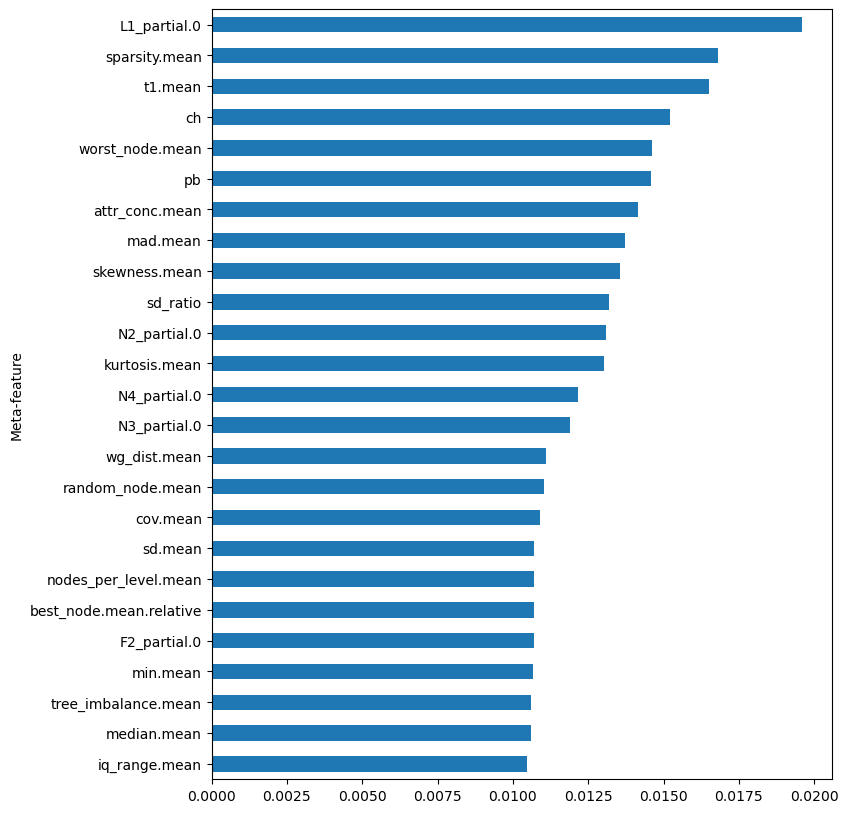

In [11]:
feature_importances_means = feature_importances.T.mean(numeric_only=True).sort_values(ascending=False)
feature_importances_means[0:25].sort_values().plot.barh(figsize=(8,10))

Meta-model feature importances when training for base model Bagging


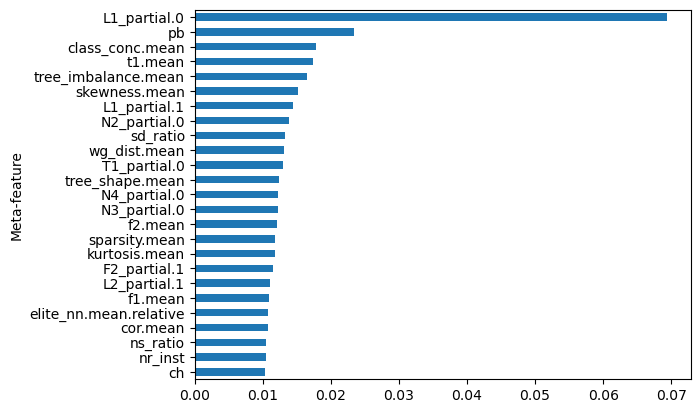

Meta-model feature importances when training for base model GLVQ


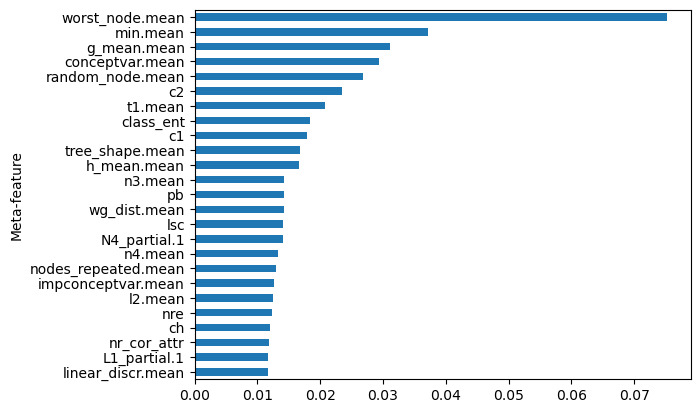

Meta-model feature importances when training for base model GP


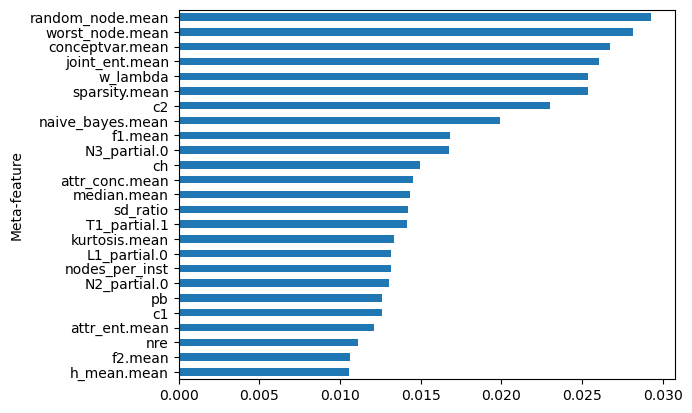

Meta-model feature importances when training for base model KNORAE


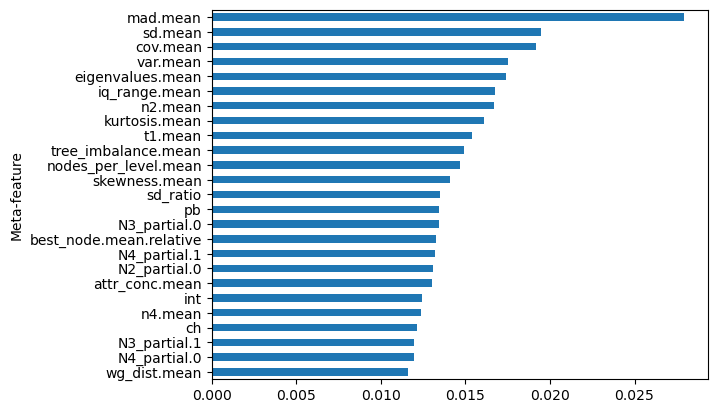

Meta-model feature importances when training for base model KNORAU


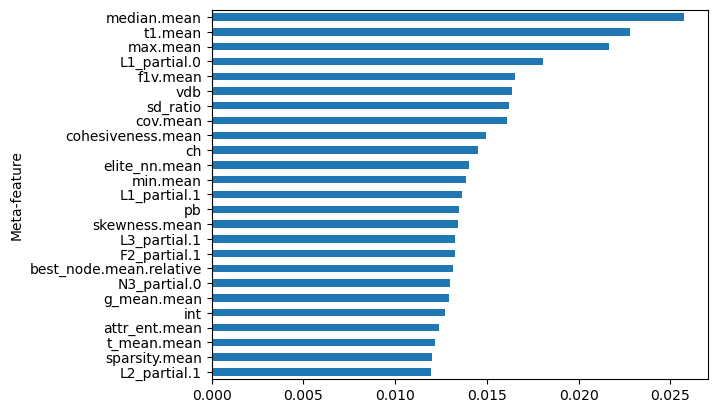

Meta-model feature importances when training for base model LCA


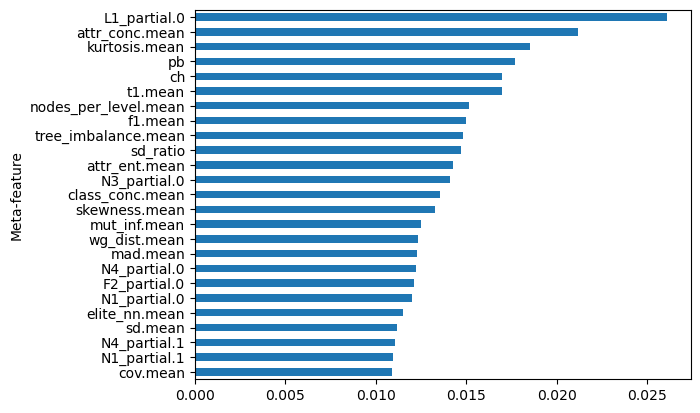

Meta-model feature importances when training for base model MCB


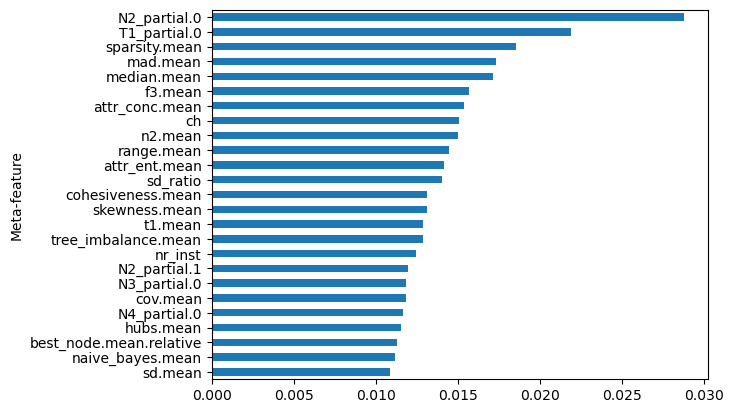

Meta-model feature importances when training for base model MLP


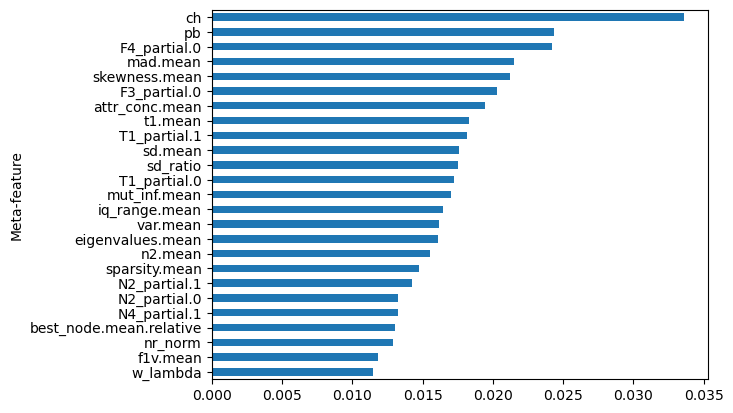

Meta-model feature importances when training for base model OLA


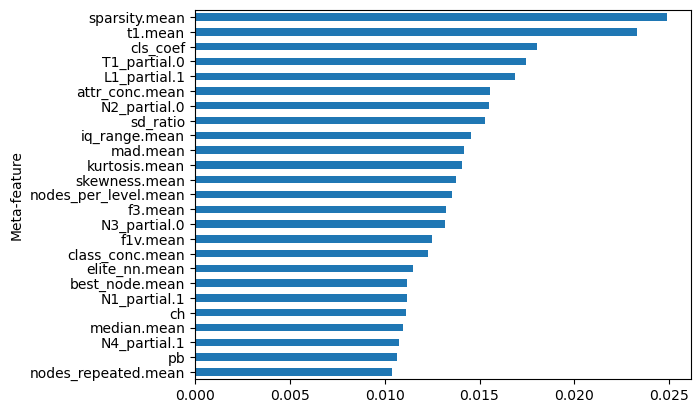

Meta-model feature importances when training for base model Percep


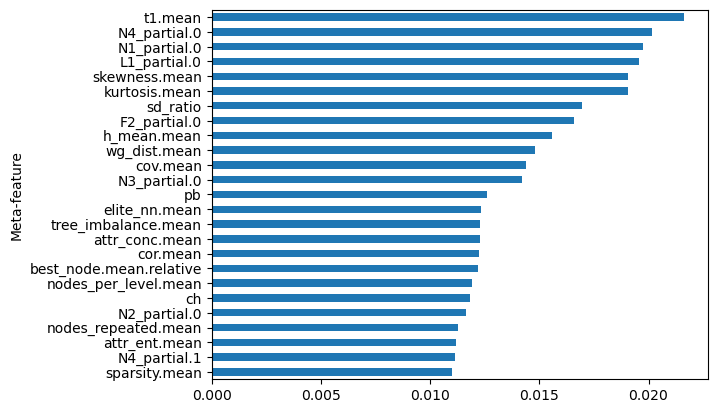

Meta-model feature importances when training for base model SVM_RBF


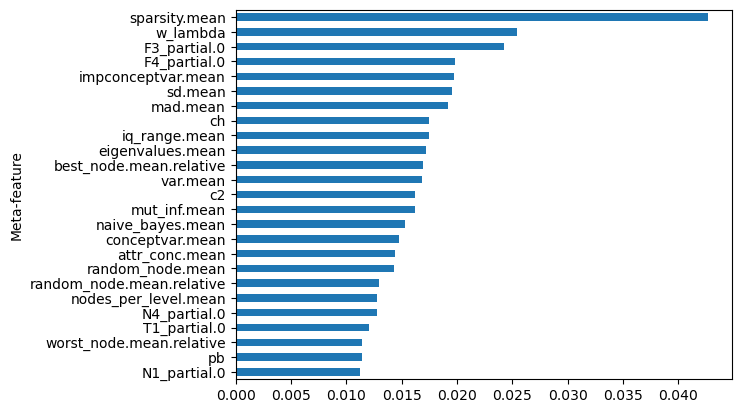

Meta-model feature importances when training for base model SVM_lin


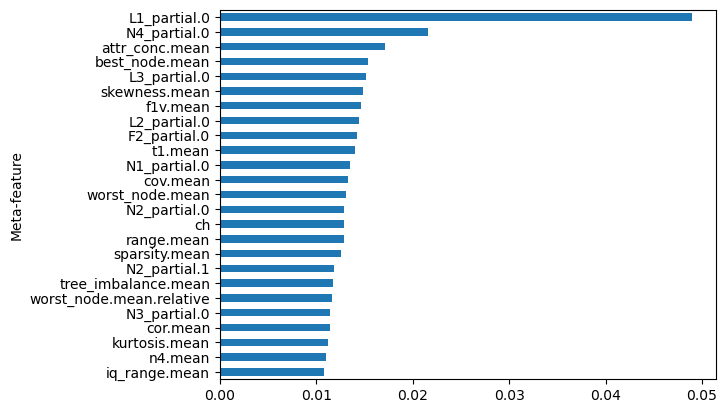

In [15]:
for model in models_names:
    print(f'Meta-model feature importances when training for base model {model}')
    feature_importances[model].sort_values(ascending=False)[0:25].sort_values().plot.barh()
    plt.show()

In [12]:
#Read meta-features descriptions:
mf_descriptions = pd.read_csv('../data/list of meta-features.csv').drop(columns=['#'])
mf_descriptions = mf_descriptions.set_index('Meta-feature')
mf_descriptions

,Type,Subtype,Origin,Description
Meta-feature,,,,
ch,Clustering,clustering,PyMFE,Calinski and Harabasz index.
int,Clustering,clustering,PyMFE,INT index.
nre,Clustering,clustering,PyMFE,Normalized relative entropy.
pb,Clustering,clustering,PyMFE,Pearson correlation between class matching and...
sc,Clustering,clustering,PyMFE,Number of clusters with size smaller than a gi...
...,...,...,...,...
L1_partial.1,Concept & complexity,linearity,ImbCoL,Distance of erroneous instances to a linear cl...
L2_partial.0,Concept & complexity,linearity,ImbCoL,Training error of a linear classifier (Class 0).
L2_partial.1,Concept & complexity,linearity,ImbCoL,Training error of a linear classifier (Class 1).


In [16]:
# Now, we will reorganize the meta-features so that mfs from the same type are together in the sequence:
mfs_types = pd.DataFrame()
mfs_types['Meta-feature'] = feature_importances.index
mfs_types = mfs_types.set_index('Meta-feature')
mfs_types = mfs_types.assign(Type=lambda row: mf_descriptions.loc[row.index]['Type'])
mfs_types = mfs_types.sort_values(by='Type', ascending=True)
feature_importances = feature_importances.reindex(index=mfs_types.index)
#feature_importances

In [17]:
#Where does each type start in the sequence? (This will help setting the legend for the figure in the next cell)
previous_type = ''
for i in range(len(mfs_types)):
    t = mfs_types.iloc[i]['Type']
    if t != previous_type: 
        print(i,t)
    previous_type = t

0 Clustering
8 Concept & complexity
56 Landmarking
70 Model-based
84 Simple, stats & info-theory


Meta-model feature importances for each base model


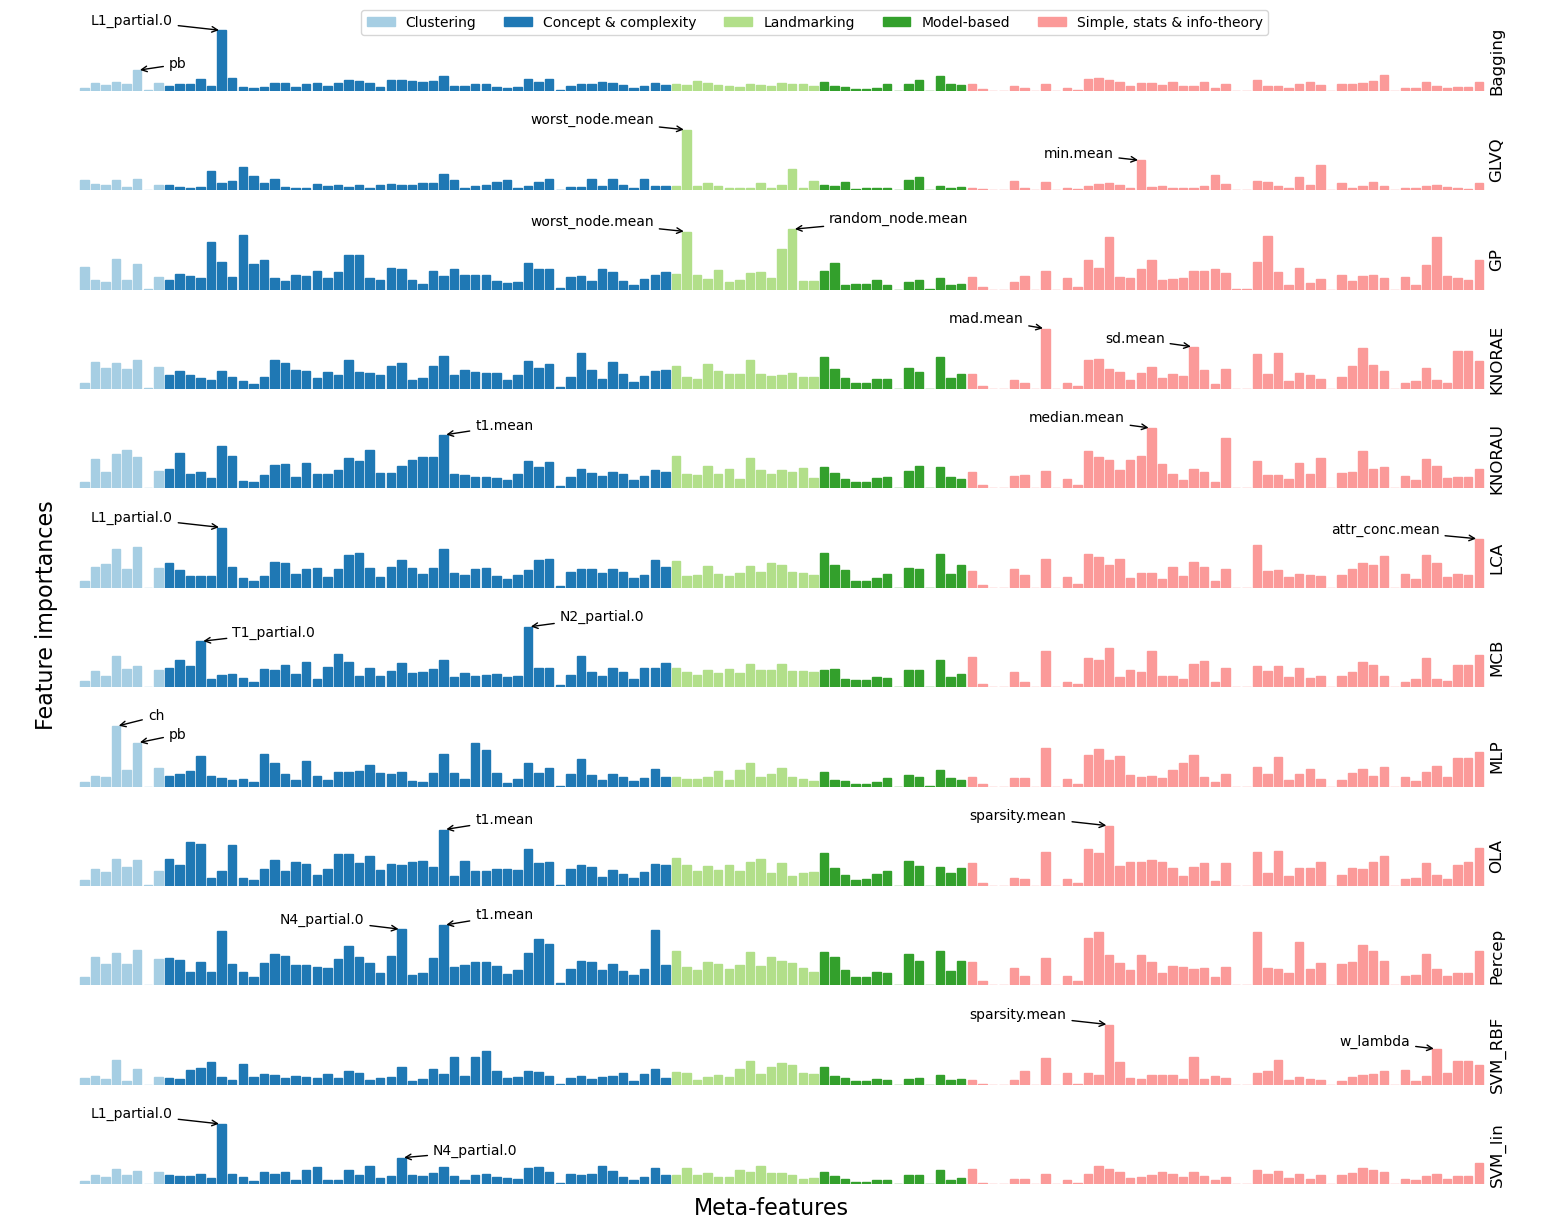

In [20]:
print(f'Meta-model feature importances for each base model')

def define_xtext(x, x_max, text):
    if x < x_max/3 and text != 'L1_partial.0':
        return x+3
    else:
        return x-(2.8+len(text)*0.8)

def define_bar_color(feature_name):
    type = mf_descriptions['Type'].loc[feature_name]
    color_num = list(mfs_types['Type'].unique()).index(type)
    #color = plt.get_cmap('Set3')(color_num)
    color = plt.get_cmap('Paired')(color_num)
    #color = np.array(color)*0.85 #make it darker
    #color[3] = 1.0 #correct alpha
    return color

x_max = len(feature_importances)
fig, axs = plt.subplots(nrows=12, ncols=1, figsize=(16,12))
#fig.suptitle('Resulting p-values from comparing Meta-models for each model.', fontsize=20)
fig.tight_layout(pad=0.5)
i = 0
for model in models_names:
    axs.flatten()[i].axis('off')
    bars = axs.flatten()[i].bar(x=range(len(feature_importances)), height=feature_importances[model]) 
    #axs.flatten()[i].set_title(model, fontsize=12, y=0.9)
    #Draw title on the right:
    axs.flatten()[i].text(133, feature_importances[model].max()/2, model, va='center', rotation='vertical', fontsize=12);
    for j in range(len(bars)):
        feature_name = feature_importances[model].index[j]
        bars[j].set_color(define_bar_color(feature_name))
        bars[j].set(label = mf_descriptions['Type'].loc[feature_name])
    #Annotations:
    sorted_importances = feature_importances[model].sort_values(ascending=False)[:3] # top 3
    first_feat = sorted_importances.index[0]
    first_val = sorted_importances.values[0]
    first_feat_x_pos = list(feature_importances[model].index).index(first_feat)
    second_feat = sorted_importances.index[1]
    second_val = sorted_importances.values[1]
    second_feat_x_pos = list(feature_importances[model].index).index(second_feat)
    # third_feat = sorted_importances.index[2]
    # third_val = sorted_importances.values[2]
    # third_feat_x_pos = list(feature_importances[model].index).index(third_feat)
    #Annotate 1st feature
    if model == 'GP':
        axs.flatten()[i].annotate(first_feat, xy=(first_feat_x_pos, first_val), 
                              xytext=(first_feat_x_pos+3.5, first_val*1.1), 
                              xycoords='data',
                              arrowprops=dict(arrowstyle="->", color='black'),
                              fontsize=10) 
    else:
        axs.flatten()[i].annotate(first_feat, xy=(first_feat_x_pos, first_val), 
                              xytext=(define_xtext(first_feat_x_pos, x_max, first_feat), first_val*1.1), 
                              xycoords='data',
                              arrowprops=dict(arrowstyle="->", color='black'),
                              fontsize=10)
    #Annotate 2nd feature
    if model == 'Percep':
        axs.flatten()[i].annotate(second_feat, xy=(second_feat_x_pos, second_val), 
                                  xytext=(second_feat_x_pos-11.5, second_val*1.1), 
                                  xycoords='data',
                                  arrowprops=dict(arrowstyle="->", color='black'),
                                  fontsize=10)
    else:
        axs.flatten()[i].annotate(second_feat, xy=(second_feat_x_pos, second_val), 
                                  xytext=(define_xtext(second_feat_x_pos, x_max, second_feat), second_val*1.1), 
                                  xycoords='data',
                                  arrowprops=dict(arrowstyle="->", color='black'),
                                  fontsize=10)
    # #Annotate 3rd feature
    # axs.flatten()[i].annotate(third_feat, xy=(third_feat_x_pos, third_val), 
    #                           xytext=(define_xtext(third_feat_x_pos, x_max, third_feat), third_val*1.1), 
    #                           xycoords='data',
    #                           arrowprops=dict(arrowstyle="->", color='black'),
    #                           fontsize=10)

    
    i += 1
fig.text(0.5, 0.00, 'Meta-features', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Feature importances', va='center', rotation='vertical', fontsize=16)
fig.legend(handles=[bars[0],bars[8],bars[56],bars[70],bars[84]],
          bbox_to_anchor=(0.815,1.01), ncol=5);
# fig.legend(handles=[bars[0],bars[8],bars[56],bars[70],bars[84]],
#           bbox_to_anchor=(0.81,-.005), ncol=5);

plt.savefig('../figs/feat_importances_per_model.pdf', bbox_inches = 'tight')

In [73]:
mf_descriptions['Type'].unique()

array(['Clustering', 'Concept & complexity',
       'Simple, stats & info-theory', 'Landmarking', 'Model-based'],
      dtype=object)

In [75]:
mfs_per_type = {}
for mf_type in mf_descriptions['Type'].unique():
    mfs_per_type[mf_type] = list(mf_descriptions[mf_descriptions['Type'] == mf_type].index)

In [76]:
mf_imp_per_type_per_mod = {}
for model in models_names:
    mf_imp_per_type = {}
    for mf_type in mfs_per_type:
        fi_sum = 0
        for mf in mfs_per_type[mf_type]:
            fi_sum += feature_importances[model][mf]
        mf_imp_per_type[mf_type] = fi_sum/len(mfs_per_type[mf_type])
    mf_imp_per_type_per_mod[model] = mf_imp_per_type

In [77]:
mf_imp_per_type_per_model = pd.DataFrame(mf_imp_per_type_per_mod).T
#Change the order to match the figure above:
types = ['Clustering', 'Concept & complexity', 'Landmarking',  'Model-based',
         'Simple, stats & info-theory']
mf_imp_per_type_per_model = mf_imp_per_type_per_model[types]

In [78]:
mf_imp_per_type_per_model.mean()

Clustering                     0.008143
Concept & complexity           0.008415
Landmarking                    0.008393
Model-based                    0.005357
Simple, stats & info-theory    0.006907
dtype: float64

In [79]:
mf_imp_per_type_per_model.T.sum()

Bagging    0.037258
GLVQ       0.039477
GP         0.036909
KNORAE     0.037745
KNORAU     0.037466
LCA        0.038458
MCB        0.036521
MLP        0.037478
OLA        0.035663
Percep     0.037415
SVM_RBF    0.036029
SVM_lin    0.036162
dtype: float64

[None, None, None, None, None, None, None, None, None, None]

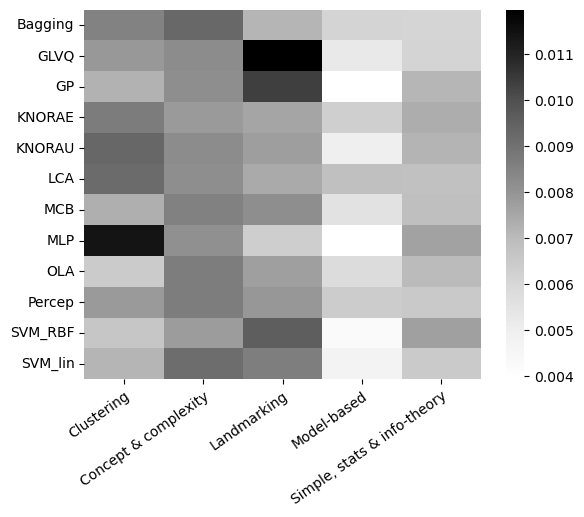

In [80]:
sns.heatmap(mf_imp_per_type_per_model, cmap='Greys')
plt.setp(plt.gca().get_xticklabels(), rotation=35, ha='right', rotation_mode="anchor", fontsize=10)
#plt.savefig('../figs/heatmap_mean_feat_impt_per_model.pdf', bbox_inches = 'tight')

### Globally (for all base models)

In [83]:
fi_global_mean = feature_importances.T.mean(numeric_only=True)
fi_global_stds = feature_importances.T.std(numeric_only=True)
fi_global_rank_means = feature_importances.T.rank(axis='columns', numeric_only=True, ascending=False).mean()
fi_global_rank_stds = feature_importances.T.rank(axis='columns', numeric_only=True, ascending=False).std()
#pd.concat([pd.DataFrame(fi_means, columns=['Mean ranking']),pd.DataFrame(fi_stds, columns=['std_dev'])])
feat_imp_all_summ = pd.DataFrame()
feat_imp_all_summ['Meanimportance'] = fi_global_mean
feat_imp_all_summ['stddev_imp'] = fi_global_stds
feat_imp_all_summ['Mean_imp_std'] = feat_imp_all_summ.apply(lambda row: f'{row.Meanimportance:.3f} ($\pm${row.stddev_imp:.3f})', axis=1)
feat_imp_all_summ['Meanranking'] = fi_global_rank_means
feat_imp_all_summ['stddev_rnk'] = fi_global_rank_stds
feat_imp_all_summ['Mean_rank_std'] = feat_imp_all_summ.apply(lambda row: f'{row.Meanranking:.3f} ($\pm${row.stddev_rnk:.3f})', axis=1)
feat_imp_all_summ = feat_imp_all_summ.assign(Type=lambda row: mf_descriptions.loc[row.index]['Type'])
feat_imp_all_summ = feat_imp_all_summ.assign(Subtype=lambda row: mf_descriptions.loc[row.index]['Subtype'])
feat_imp_all_summ = feat_imp_all_summ.assign(Origin=lambda row: mf_descriptions.loc[row.index]['Origin'])
feat_imp_all_summ = feat_imp_all_summ.assign(Description=lambda row: mf_descriptions.loc[row.index]['Description'])
feat_imp_all_summ = feat_imp_all_summ.sort_values(by='Meanranking')
feat_imp_all_summ = feat_imp_all_summ.drop(columns=['Meanimportance', 'stddev_imp', 'Meanranking', 'stddev_rnk'])
feat_imp_all_summ = feat_imp_all_summ.rename(columns={'Mean_imp_std':'Mean importance', 'Mean_rank_std':'Mean ranking'})
feat_imp_all_summ.to_csv('../results/csv_tabs/feat_import_DMI_ALL_summary.csv', float_format='%.3f')

In [84]:
print('Top 15 meta-features considering the mean ranking over all 12 base models:')
feat_imp_all_summ[:15]     

Top 15 meta-features considering the mean ranking over all 12 base models:


,Mean importance,Mean ranking,Type,Subtype,Origin,Description
Meta-feature,,,,,,
ch,0.015 ($\pm$0.006),14.000 ($\pm$7.874),Clustering,clustering,PyMFE,Calinski and Harabasz index.
t1.mean,0.016 ($\pm$0.005),14.333 ($\pm$19.246),Concept & complexity,complexity,PyMFE,Fraction of hyperspheres covering data.
pb,0.015 ($\pm$0.005),15.583 ($\pm$9.671),Clustering,clustering,PyMFE,Pearson correlation between class matching and...
attr_conc.mean,0.014 ($\pm$0.004),16.917 ($\pm$14.594),"Simple, stats & info-theory",info-theory,PyMFE,Compute concentration coef. of each pair of di...
sparsity.mean,0.017 ($\pm$0.010),18.333 ($\pm$13.727),"Simple, stats & info-theory",statistical,PyMFE,(Possibly normalized) sparsity metric for each...
skewness.mean,0.014 ($\pm$0.004),18.333 ($\pm$17.233),"Simple, stats & info-theory",statistical,PyMFE,Skewness for each attribute.
kurtosis.mean,0.013 ($\pm$0.003),19.917 ($\pm$12.003),"Simple, stats & info-theory",statistical,PyMFE,Kurtosis of each attribute.
sd_ratio,0.013 ($\pm$0.004),20.333 ($\pm$19.579),"Simple, stats & info-theory",statistical,PyMFE,Statistical test for homogeneity of covariances.
N2_partial.0,0.013 ($\pm$0.006),24.083 ($\pm$19.528),Concept & complexity,neighborhood,ImbCoL,Average intra/inter class nearest neighbor dis...


### Per model

In [85]:
feat_imp_summ = {}
for model in models_names:
    feat_imp_summ[model] = pd.DataFrame()
    feat_imp_summ[model]['Importance'] = feature_importances[model]
    feat_imp_summ[model]['Ranking'] = pd.DataFrame(feature_importances[model]).rank(axis='index', numeric_only=True, ascending=False)[model]
    feat_imp_summ[model] = feat_imp_summ[model].assign(Type=lambda row: mf_descriptions.loc[row.index]['Type'])
    feat_imp_summ[model] = feat_imp_summ[model].assign(Origin=lambda row: mf_descriptions.loc[row.index]['Origin'])
    feat_imp_summ[model] = feat_imp_summ[model].assign(Description=lambda row: mf_descriptions.loc[row.index]['Description'])
    feat_imp_summ[model].sort_values(by='Ranking').to_csv(f'../results/csv_tabs/feat_import_DMI_{model}_summary.csv', float_format='%.3f')

In [86]:
model = 'OLA'
print(f'Top 15 meta-features considering the ranking for base model {model}:')
feat_imp_summ[model].sort_values(by='Ranking')[:15]

Top 15 meta-features considering the ranking for base model OLA:


,Importance,Ranking,Type,Origin,Description
Meta-feature,,,,,
sparsity.mean,0.024896,1.0,"Simple, stats & info-theory",PyMFE,(Possibly normalized) sparsity metric for each...
t1.mean,0.023282,2.0,Concept & complexity,PyMFE,Fraction of hyperspheres covering data.
cls_coef,0.018034,3.0,Concept & complexity,PyMFE,Clustering coefficient.
T1_partial.0,0.017457,4.0,Concept & complexity,ImbCoL,Fraction of maximum covering spheres on data (...
L1_partial.1,0.016880,5.0,Concept & complexity,ImbCoL,Distance of erroneous instances to a linear cl...
attr_conc.mean,0.015559,6.0,"Simple, stats & info-theory",PyMFE,Compute concentration coef. of each pair of di...
N2_partial.0,0.015478,7.0,Concept & complexity,ImbCoL,Average intra/inter class nearest neighbor dis...
sd_ratio,0.015285,8.0,"Simple, stats & info-theory",PyMFE,Statistical test for homogeneity of covariances.
iq_range.mean,0.014566,9.0,"Simple, stats & info-theory",PyMFE,Interquartile range (IQR) of each attribute.


In [87]:
model = 'Percep'
print(f'Top 15 meta-features considering the ranking for base model {model}:')
feat_imp_summ[model].sort_values(by='Ranking')[:15]

Top 15 meta-features considering the ranking for base model Percep:


,Importance,Ranking,Type,Origin,Description
Meta-feature,,,,,
t1.mean,0.021624,1.0,Concept & complexity,PyMFE,Fraction of hyperspheres covering data.
N4_partial.0,0.020146,2.0,Concept & complexity,ImbCoL,Nonlinearity of the one-nearest neighbor class...
N1_partial.0,0.019769,3.0,Concept & complexity,ImbCoL,Fraction of points lying on the class boundary...
L1_partial.0,0.019579,4.0,Concept & complexity,ImbCoL,Distance of erroneous instances to a linear cl...
skewness.mean,0.019080,5.0,"Simple, stats & info-theory",PyMFE,Skewness for each attribute.
kurtosis.mean,0.019039,6.0,"Simple, stats & info-theory",PyMFE,Kurtosis of each attribute.
sd_ratio,0.016958,7.0,"Simple, stats & info-theory",PyMFE,Statistical test for homogeneity of covariances.
F2_partial.0,0.016576,8.0,Concept & complexity,ImbCoL,Overlapping of the per-class bounding boxes (C...
h_mean.mean,0.015573,9.0,"Simple, stats & info-theory",PyMFE,Harmonic mean of each attribute.


## Classification performances

In [199]:
summary_predictions_DMI

,Model,Dataset,NS,SS,MMS,MAS,RS,QT,Oracle's ST,Oracles's Perf,Meta-scaler's ST,Meta-scaler's Perf
0,Bagging,D1,0.440079,0.466025,0.394689,0.303649,0.449671,0.451235,SS,0.466025,QT,0.451235
1,GLVQ,D1,0.434862,0.462094,0.418003,0.445430,0.469747,0.487364,QT,0.487364,NS,0.434862
2,GP,D1,0.362818,0.474876,0.384721,0.000000,0.484660,0.441929,RS,0.484660,QT,0.441929
3,KNORAE,D1,0.435348,0.447054,0.492395,0.450039,0.432771,0.413654,MMS,0.492395,NS,0.435348
4,KNORAU,D1,0.443713,0.468347,0.487077,0.432025,0.478051,0.505159,QT,0.505159,NS,0.443713
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,MLP,D300,0.601871,0.431757,0.601871,0.601871,0.438325,0.415073,NS,0.601871,NS,0.601871
3596,OLA,D300,0.414099,0.445926,0.386136,0.446185,0.376316,0.497744,QT,0.497744,SS,0.445926
3597,Percep,D300,0.265806,0.434663,0.237405,0.267137,0.377495,0.421451,SS,0.434663,RS,0.377495
3598,SVM_RBF,D300,0.186589,0.190331,0.201437,0.179149,0.217621,0.202262,RS,0.217621,NS,0.186589


In [200]:
# Selecting the performances (F1) columns only:
perfs = summary_predictions_DMI[['Model', 'NS', 'SS', 'MMS', 'MAS', 'RS',
                                'QT', "Meta-scaler's Perf", "Oracles's Perf"]]
# Renaming columns:
perfs = perfs.rename(columns={"Meta-scaler's Perf":'Meta-scaler', "Oracles's Perf":'Oracle'})
perfs


,Model,NS,SS,MMS,MAS,RS,QT,Meta-scaler,Oracle
0,Bagging,0.440079,0.466025,0.394689,0.303649,0.449671,0.451235,0.451235,0.466025
1,GLVQ,0.434862,0.462094,0.418003,0.445430,0.469747,0.487364,0.434862,0.487364
2,GP,0.362818,0.474876,0.384721,0.000000,0.484660,0.441929,0.441929,0.484660
3,KNORAE,0.435348,0.447054,0.492395,0.450039,0.432771,0.413654,0.435348,0.492395
4,KNORAU,0.443713,0.468347,0.487077,0.432025,0.478051,0.505159,0.443713,0.505159
...,...,...,...,...,...,...,...,...,...
3595,MLP,0.601871,0.431757,0.601871,0.601871,0.438325,0.415073,0.601871,0.601871
3596,OLA,0.414099,0.445926,0.386136,0.446185,0.376316,0.497744,0.445926,0.497744
3597,Percep,0.265806,0.434663,0.237405,0.267137,0.377495,0.421451,0.377495,0.434663
3598,SVM_RBF,0.186589,0.190331,0.201437,0.179149,0.217621,0.202262,0.186589,0.217621


#### Hypothesis test (included in paper)

Now, let's do a Wilcoxon paired test comparing each ST to the Meta-scaler.
First we need to perform a normality test and then a hypothesis test to verify if the differences in results for each ST over the different base models are in fact statistically significant.

In [201]:
perfs.columns

Index(['Model', 'NS', 'SS', 'MMS', 'MAS', 'RS', 'QT', 'Meta-scaler', 'Oracle'], dtype='object')

In [202]:
names = ['NS', 'SS', 'MMS', 'MAS', 'RS', 'QT', 'Meta-scaler', 'Oracle']

#Normality tests:
print('*** Shapiro-Wilk normality test for each of the 8 samples: ***')
for name in names:
    print(name)
    stat, p = stats.shapiro(perfs[name].values)
    if p > 0.05: print(f'Probably Gaussian (p={p}).') # null hypothesis: x comes from a normal distribution
    else: print(f'Probably not Gaussian (p={p}).')

        

*** Shapiro-Wilk normality test for each of the 8 samples: ***
NS
Probably not Gaussian (p=0.0).
SS
Probably not Gaussian (p=0.0).
MMS
Probably not Gaussian (p=0.0).
MAS
Probably not Gaussian (p=0.0).
RS
Probably not Gaussian (p=0.0).
QT
Probably not Gaussian (p=0.0).
Meta-scaler
Probably not Gaussian (p=0.0).
Oracle
Probably not Gaussian (p=0.0).


Since normality tests indicated that samples may not follow a normal distribution, let's apply a non parametric test. Friedman test seems to be adequate since "Due to the assumption that the test statistic has a chi squared distribution, the p-value is only reliable for n > 10 and more than 6 repeated samples." In our case n = 36000 and n_samples = 8.

In [203]:
#Friedman test:
friedm_result = friedmanchisquare(perfs['NS'].values, perfs['SS'].values, perfs['MMS'].values,
                                  perfs['MAS'].values, perfs['RS'].values, perfs['QT'].values,
                                  perfs['Meta-scaler'].values, perfs['Oracle'].values)
print(friedm_result)
alpha = 0.05
if friedm_result.pvalue < alpha:
    print('Reject the null hypothesis that the mean for each population is equal')
else: 
    print('Fail to reject the null hypothesis that the mean for each population is equal')

FriedmanchisquareResult(statistic=5683.922790423172, pvalue=0.0)
Reject the null hypothesis that the mean for each population is equal


In [204]:
# # Now, since the samples differences are said to be significantly different, we will test the symetries of the differences to decide which test to use:
# # First lets see if the differences have a symetric distribution:
# diffs_dict={}
# for i in range(0,6):
#     diffs_dict[i] = groups[6]-groups[i]
# diffs = pd.DataFrame(diffs_dict)
# diffs.plot(kind='box', title='Distributions of the differences among the Meta-scaler and each ST')

Perform the Wilcoxon signed-rank test comparing each ST to the Meta-scaler:

In [205]:
#Correcting alpha via Bonferroni correction:
names = ['NS', 'SS', 'MMS', 'MAS', 'RS', 'QT', 'Meta-scaler', 'Oracle']
n_samples = len(names)
alpha = 0.05
c_alpha = alpha/(n_samples*(n_samples-1))
print(f'Corrected alpha = {c_alpha}')

#Wilcoxon signed rank test
pvalues = {}
for i in range(0,8):
    if i != 6:
        print(f'\n\nComparing Meta-scaler with {names[i]}:')
        diff = (perfs['Meta-scaler'].values -  perfs[names[i]].values)
        res = stats.wilcoxon(diff)
        print('H_0: no difference')
        print(res)
        if res.pvalue < c_alpha:
            print(f'Meta-scaler significantly different than {names[i]}')
        else:
            print(f'Meta-scaler NOT significantly different than {names[i]}')
        pvalues[names[i]] = res.pvalue
    else:
        pvalues[names[i]] = np.nan


Corrected alpha = 0.0008928571428571429


Comparing Meta-scaler with NS:
H_0: no difference
WilcoxonResult(statistic=496633.0, pvalue=1.0798371371925606e-174)
Meta-scaler significantly different than NS


Comparing Meta-scaler with SS:
H_0: no difference
WilcoxonResult(statistic=1209483.0, pvalue=2.484452585519375e-62)
Meta-scaler significantly different than SS


Comparing Meta-scaler with MMS:
H_0: no difference
WilcoxonResult(statistic=850549.5, pvalue=7.41817342533283e-99)
Meta-scaler significantly different than MMS


Comparing Meta-scaler with MAS:
H_0: no difference
WilcoxonResult(statistic=732292.5, pvalue=3.0249209133038527e-75)
Meta-scaler significantly different than MAS


Comparing Meta-scaler with RS:
H_0: no difference
WilcoxonResult(statistic=1080035.0, pvalue=2.4167090592723103e-52)
Meta-scaler significantly different than RS


Comparing Meta-scaler with QT:
H_0: no difference
WilcoxonResult(statistic=834259.5, pvalue=1.5199445345966482e-114)
Meta-scaler significantly d

In [206]:
pvalues

{'NS': 1.0798371371925606e-174,
 'SS': 2.484452585519375e-62,
 'MMS': 7.41817342533283e-99,
 'MAS': 3.0249209133038527e-75,
 'RS': 2.4167090592723103e-52,
 'QT': 1.5199445345966482e-114,
 'Meta-scaler': nan,
 'Oracle': 0.0}

In [927]:
pvalues_df = pd.DataFrame(pvalues, index=[0])[['NS','SS','MMS','MAS','RS','QT','Oracle']].T
pvalues_df.to_csv('../results/csv_tabs/p_values_wilcoxon_clf_perfs.csv', encoding='utf8', float_format='%.4e', index=True)

In [928]:
pvalues_df = pvalues_df.T.rename(index={0:'p-values'})
pvalues_df['Meta-scaler'] = 'N/A'
pvalues_df = pvalues_df.loc[:,['NS','SS','MMS','MAS','RS','QT','Meta-scaler','Oracle']]
# Transforming values to string and formatting them:
for col in ['NS', 'SS', 'MMS', 'MAS', 'RS', 'QT']:
    pvalues_df[col] = f'{pvalues_df[col].values[0]:.1e}'

In [929]:
pvalues_df

,NS,SS,MMS,MAS,RS,QT,Meta-scaler,Oracle
p-values,1.1e-174,2.5e-62,7.4e-99,3.0e-75,2.4e-52,1.5e-114,N/A,0.0


### Mean performances by model

In [930]:
mean_perf = perfs.groupby('Model').mean()
mean_perf

,NS,SS,MMS,MAS,RS,QT,Meta-scaler,Oracle
Model,,,,,,,,
Bagging,0.673594,0.714167,0.709450,0.704610,0.714275,0.711905,0.716966,0.731099
GLVQ,0.632876,0.622303,0.633579,0.652021,0.616737,0.602517,0.657624,0.664166
GP,0.740945,0.709744,0.730336,0.735978,0.672132,0.699824,0.752240,0.767073
KNORAE,0.724432,0.720988,0.721360,0.729274,0.737060,0.718474,0.743411,0.759312
KNORAU,0.706431,0.718591,0.712452,0.716867,0.732436,0.714506,0.738188,0.748576
LCA,0.619214,0.687280,0.652338,0.643596,0.690522,0.683929,0.678783,0.720666
MCB,0.718955,0.719740,0.717914,0.726693,0.732702,0.716226,0.743146,0.759971
MLP,0.667508,0.688575,0.651787,0.642455,0.668350,0.683295,0.700806,0.735850
OLA,0.718183,0.719958,0.720366,0.727349,0.734347,0.715079,0.743671,0.759698


In [931]:
med_df = pd.DataFrame(mean_perf.median()).T
med_df = med_df.rename(index={0:'Median'})
means_df = pd.DataFrame(mean_perf.mean()).T
means_df = means_df.rename(index={0:'Mean'})
stddev_df = pd.DataFrame(mean_perf.std()).T
stddev_df = stddev_df.rename(index={0:'Stddev'})
mean_rank_df = pd.DataFrame(mean_perf.iloc[:,:-1].rank(axis='columns', numeric_only=True, ascending=False).mean()).T
mean_rank_df = mean_rank_df.rename(index={0:'Mean rank'}).round(decimals=4)
mean_rank_df['Oracle'] = 'N/A'
#mean_perf = pd.concat([mean_perf, med_df, means_df, stddev_df, mean_rank_df, pvalues_df])
mean_perf = pd.concat([mean_perf.round(decimals=4), 
                       med_df.round(decimals=4), 
                       means_df.round(decimals=4), 
                       stddev_df.round(decimals=4), 
                       mean_rank_df,
                       pvalues_df])

mean_perf

,NS,SS,MMS,MAS,RS,QT,Meta-scaler,Oracle
Bagging,0.6736,0.7142,0.7094,0.7046,0.7143,0.7119,0.717,0.7311
GLVQ,0.6329,0.6223,0.6336,0.652,0.6167,0.6025,0.6576,0.6642
GP,0.7409,0.7097,0.7303,0.736,0.6721,0.6998,0.7522,0.7671
KNORAE,0.7244,0.721,0.7214,0.7293,0.7371,0.7185,0.7434,0.7593
KNORAU,0.7064,0.7186,0.7125,0.7169,0.7324,0.7145,0.7382,0.7486
LCA,0.6192,0.6873,0.6523,0.6436,0.6905,0.6839,0.6788,0.7207
MCB,0.719,0.7197,0.7179,0.7267,0.7327,0.7162,0.7431,0.76
MLP,0.6675,0.6886,0.6518,0.6425,0.6683,0.6833,0.7008,0.7358
OLA,0.7182,0.72,0.7204,0.7273,0.7343,0.7151,0.7437,0.7597
Percep,0.5932,0.6889,0.651,0.642,0.6876,0.6864,0.6702,0.7249


In [932]:
mean_perf.to_csv('../results/csv_tabs/mean_clf_perfs_DMI.csv', encoding='utf8', index=True, float_format='%.4f')

#### Hypothesis test for the means (not included in paper)

Now, let's add a row stating the result of a Wilcoxon paired test comparing each ST to the Meta-scaler.
First we need to perform a normality test and then a hypothesis test to verify if the differences in results for each ST over the different base models are in fact statistically significant.

In [84]:
mean_perf['NS'][:-3].values

groups = []
for g in ['NS', 'SS', 'MMS', 'MAS', 'RS', 'QT', 'Meta-scaler']:
    groups.append(mean_perf[g][:-3].values)

In [85]:
#Normality tests:

print('*** Shapiro-Wilk normality test for each of the 7 samples: ***')
for g in groups:
    stat, p = stats.shapiro(g)
    print(f'stat={stat}, p-value={p}')
    if p > 0.05: print('Probably Gaussian') # null hypothesis: x comes from a normal distribution
    else: print('Probably not Gaussian')

        
print('\n\n*** Chi-Square normality test for each of the 7 samples: ***')
for g in groups:
    stat, p = stats.chisquare(g)
    print(f'stat={stat}, p-value={p}')
    if p > 0.05: print('Probably Gaussian') # null hypothesis: x comes from a normal distribution
    else: print('Probably not Gaussian')


*** Shapiro-Wilk normality test for each of the 7 samples: ***
stat=0.9275144934654236, p-value=0.3545108735561371
Probably Gaussian
stat=0.739165186882019, p-value=0.0020643628668040037
Probably not Gaussian
stat=0.8212172985076904, p-value=0.016495341435074806
Probably not Gaussian
stat=0.8093846440315247, p-value=0.012002005241811275
Probably not Gaussian
stat=0.8648589849472046, p-value=0.05626543238759041
Probably Gaussian
stat=0.6925772428512573, p-value=0.000715420872438699
Probably not Gaussian
stat=0.87579345703125, p-value=0.07743718475103378
Probably Gaussian


*** Chi-Square normality test for each of the 7 samples: ***
stat=0.03473258986631091, p-value=0.9999999999992875
Probably Gaussian
stat=0.012713588799137617, p-value=0.9999999999999971
Probably Gaussian
stat=0.019957354717693755, p-value=0.9999999999999659
Probably Gaussian
stat=0.02354086640139723, p-value=0.9999999999999157
Probably Gaussian
stat=0.021320449656276722, p-value=0.999999999999951
Probably Gaussian
sta

Since one of the two tests indicated that some samples may not follow a normal distribution, let's apply a non parametric test. Friedman test seems to be adequate since "Due to the assumption that the test statistic has a chi squared distribution, the p-value is only reliable for n > 10 and more than 6 repeated samples." In our case n = 12 and n_samples = 7.

In [87]:
#Friedman test:
friedm_result = friedmanchisquare(groups[0], groups[1], groups[2], groups[3], groups[4], groups[5], groups[6])
print(friedm_result)
alpha = 0.05
if friedm_result.pvalue < alpha:
    print('Reject the null hypothesis that the mean for each population is equal')
else: 
    print('Fail to reject the null hypothesis that the mean for each population is equal')

FriedmanchisquareResult(statistic=30.357142857142833, pvalue=3.361526889328739e-05)
Reject the null hypothesis that the mean for each population is equal


In [88]:
# # Now, since the samples differences are said to be significantly different, we will test the symetries of the differences to decide which test to use:
# # First lets see if the differences have a symetric distribution:
# diffs_dict={}
# for i in range(0,6):
#     diffs_dict[i] = groups[6]-groups[i]
# diffs = pd.DataFrame(diffs_dict)
# diffs.plot(kind='box', title='Distributions of the differences among the Meta-scaler and each ST')

Perform the Wilcoxon signed-rank test comparing each ST to the Meta-scaler:

In [89]:
#Correcting alpha via Bonferroni correction:
n_samples = len(groups)
alpha = 0.05
c_alpha = alpha/(n_samples*(n_samples-1))
names = ['NS', 'SS', 'MMS', 'MAS', 'RS', 'QT', 'Meta-scaler']
print(f'Corrected alpha = {c_alpha}')

#Wilcoxon signed rank test
for i in range(0,6):
    print(f'\n\nComparing Meta-scaler with {names[i]}:')
    diff = (groups[-1] - groups[i])
    res = stats.wilcoxon(diff)
    print('H_0: no difference')
    print(res)
    if res.pvalue < c_alpha:
        print(f'Meta-scaler significantly different than {names[i]}')
    else:
        print(f'Meta-scaler NOT significantly different than {names[i]}')
        
#     res = stats.wilcoxon(diff, alternative='greater')
#     print('H_0: meta-scaler lower')
#     print(res)
#     if res.pvalue < c_alpha:
#         print(f'Meta-scaler significantly greater than {names[i]}')
#     else:
#         print(f'Meta-scaler NOT significantly greater than {names[i]}')

Corrected alpha = 0.0011904761904761906


Comparing Meta-scaler with NS:
H_0: no difference
WilcoxonResult(statistic=0.0, pvalue=0.00048828125)
Meta-scaler significantly different than NS


Comparing Meta-scaler with SS:
H_0: no difference
WilcoxonResult(statistic=9.0, pvalue=0.01611328125)
Meta-scaler NOT significantly different than SS


Comparing Meta-scaler with MMS:
H_0: no difference
WilcoxonResult(statistic=0.0, pvalue=0.00048828125)
Meta-scaler significantly different than MMS


Comparing Meta-scaler with MAS:
H_0: no difference
WilcoxonResult(statistic=0.0, pvalue=0.00048828125)
Meta-scaler significantly different than MAS


Comparing Meta-scaler with RS:
H_0: no difference
WilcoxonResult(statistic=17.0, pvalue=0.09228515625)
Meta-scaler NOT significantly different than RS


Comparing Meta-scaler with QT:
H_0: no difference
WilcoxonResult(statistic=6.0, pvalue=0.0068359375)
Meta-scaler NOT significantly different than QT


#### Box plots (not included in paper)

In [90]:
perfs = summary_predictions_DMI[['Model', 'NS', 'SS', 'MMS', 'MAS', 'RS',
                                'QT', "Meta-scaler's Perf", "Oracles's Perf"]]
perfs = perfs.rename(columns={"Meta-scaler's Perf":'Meta-scaler', "Oracles's Perf":'Oracle'})
perfs

,Model,NS,SS,MMS,MAS,RS,QT,Meta-scaler,Oracle
0,Bagging,0.440079,0.466025,0.394689,0.303649,0.449671,0.451235,0.451235,0.466025
1,GLVQ,0.434862,0.462094,0.418003,0.445430,0.469747,0.487364,0.434862,0.487364
2,GP,0.362818,0.474876,0.384721,0.000000,0.484660,0.441929,0.441929,0.484660
3,KNORAE,0.435348,0.447054,0.492395,0.450039,0.432771,0.413654,0.435348,0.492395
4,KNORAU,0.443713,0.468347,0.487077,0.432025,0.478051,0.505159,0.443713,0.505159
...,...,...,...,...,...,...,...,...,...
3595,MLP,0.601871,0.431757,0.601871,0.601871,0.438325,0.415073,0.601871,0.601871
3596,OLA,0.414099,0.445926,0.386136,0.446185,0.376316,0.497744,0.445926,0.497744
3597,Percep,0.265806,0.434663,0.237405,0.267137,0.377495,0.421451,0.377495,0.434663
3598,SVM_RBF,0.186589,0.190331,0.201437,0.179149,0.217621,0.202262,0.186589,0.217621


Classification Performances considering all models and datasets


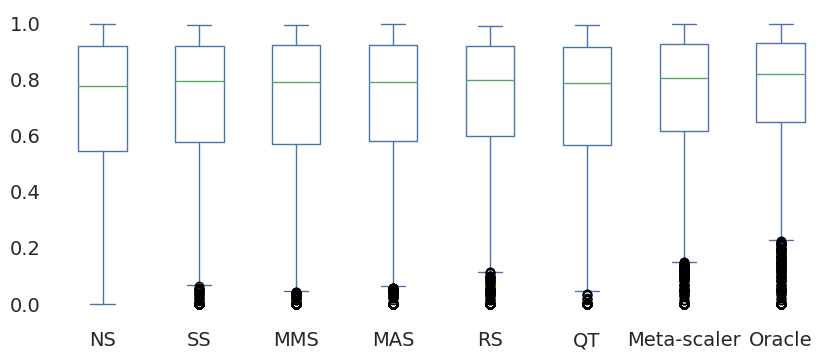

In [91]:
print('Classification Performances considering all models and datasets')
perfs.plot(kind='box', figsize=(10,4), title='',fontsize=14);
plt.savefig('../figs/box_plot_clf_perf_DMI_all_mod.pdf', bbox_inches = 'tight')

In [92]:
perfs[['NS', 'SS', 'MMS', 'MAS', 'RS', 'QT', 'Meta-scaler', 'Oracle']].mean()

NS             0.681126
SS             0.701485
MMS            0.693345
MAS            0.694748
RS             0.701914
QT             0.694294
Meta-scaler    0.715997
Oracle         0.736163
dtype: float64

Classification performances (F1) for each model


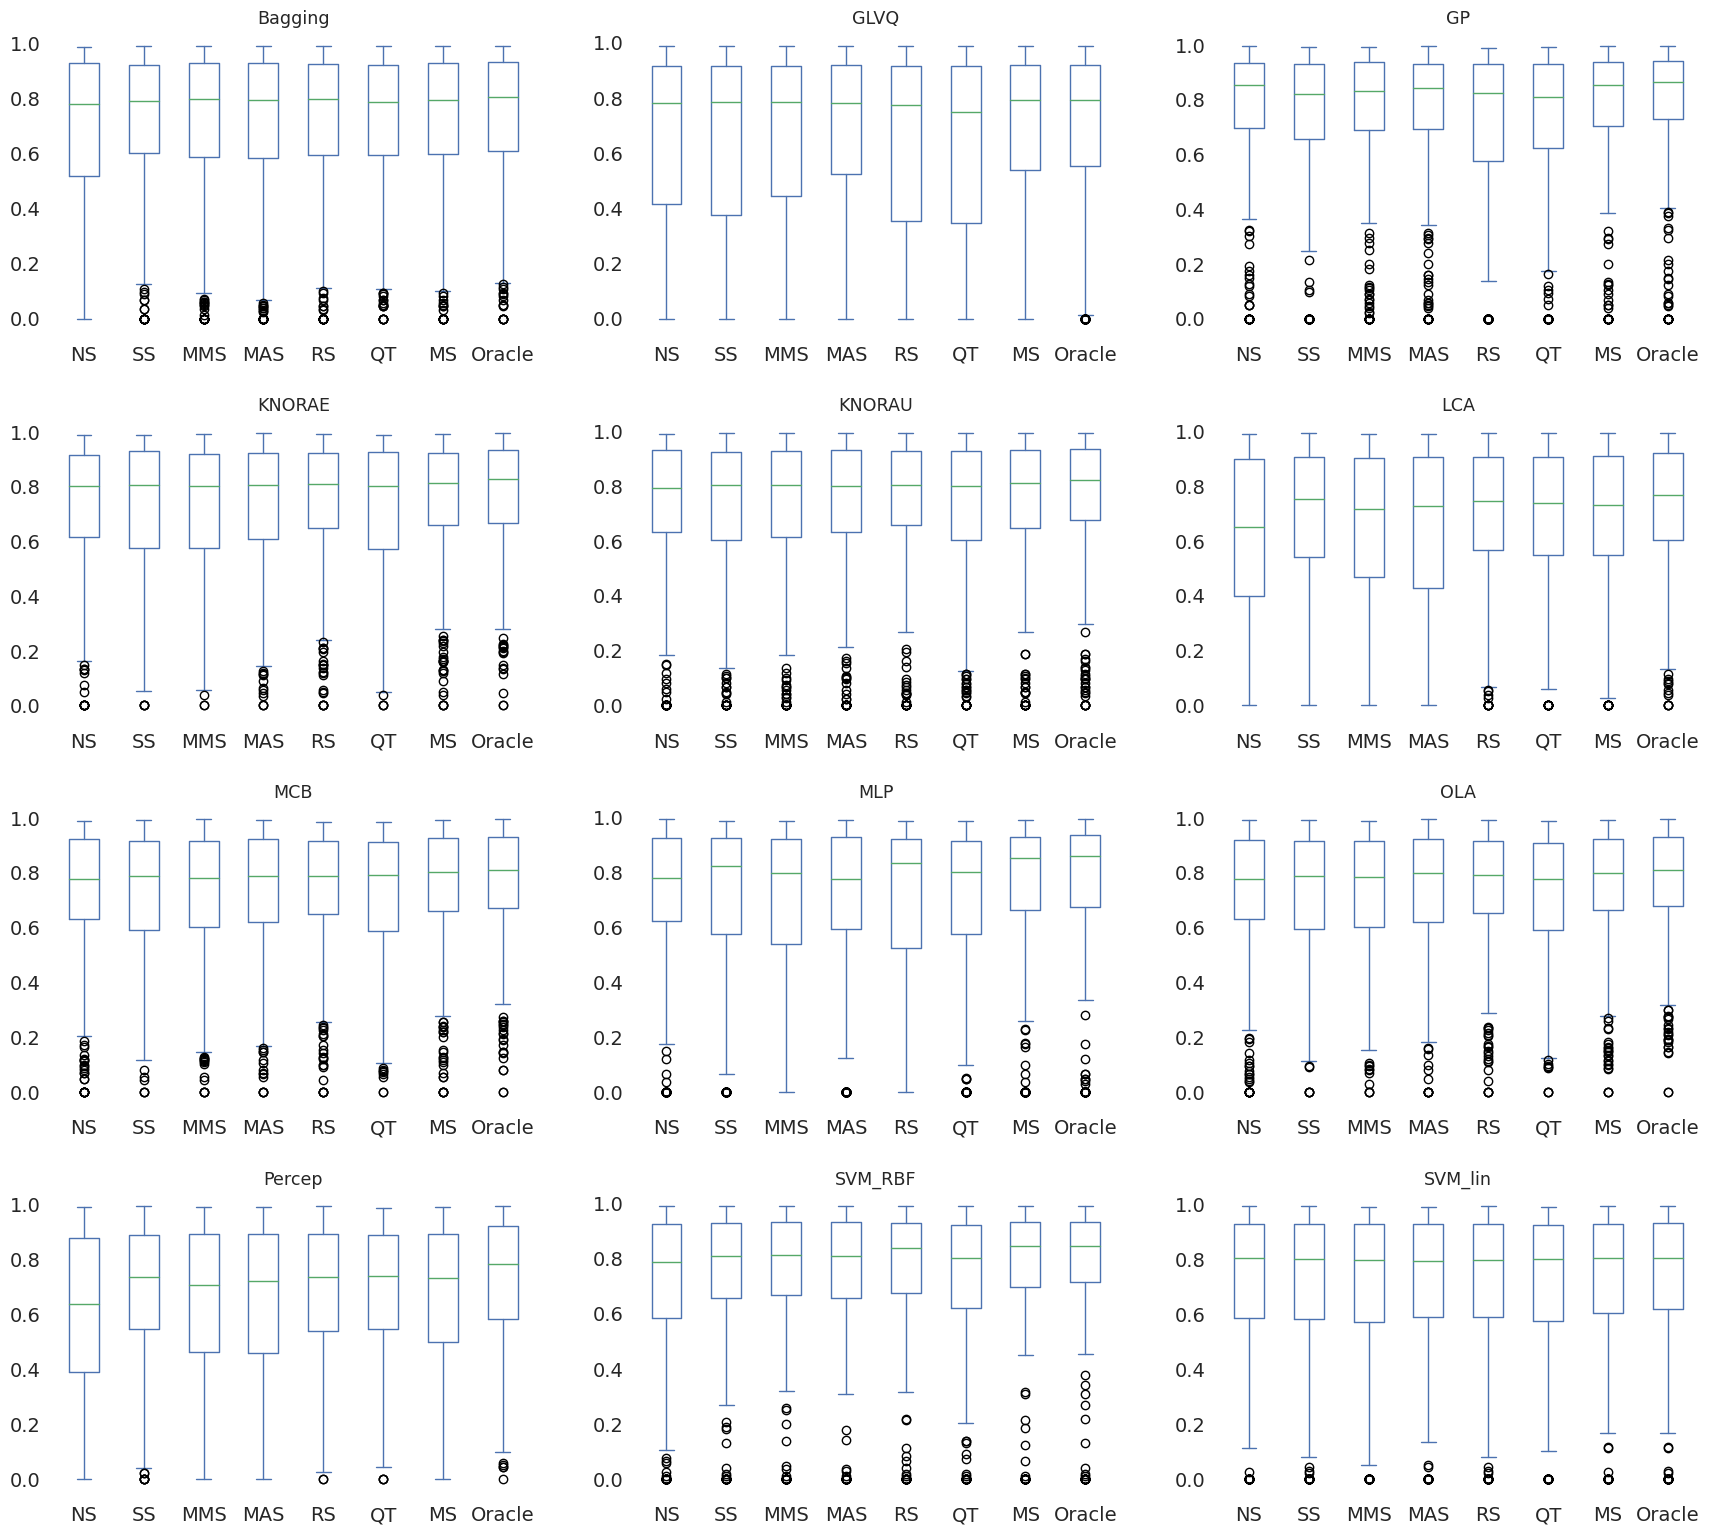

In [93]:
print('Classification performances (F1) for each model')
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18,16))
#fig.suptitle('Classification performances (F1) for each model', fontsize=20)
fig.tight_layout(pad=3.0)
i = 0
for model in models_names:
    perfs = summary_predictions_DMI[['Model', 'NS', 'SS', 'MMS', 'MAS', 'RS',
                                'QT', "Meta-scaler's Perf", "Oracles's Perf"]]
    perfs = perfs.rename(columns={"Meta-scaler's Perf":'MS', "Oracles's Perf":'Oracle'})
    perfs = perfs[perfs['Model']==model]
    perfs.plot(kind='box', title=model, ax=axs.flatten()[i],fontsize=14);
    i += 1

#plt.savefig('../figs/box_plot_clf_perf_DMI_per_mod.pdf', bbox_inches = 'tight')